### Load the Data 

In [1]:
#importing neccessary packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from collections import Counter

In [2]:
# features
fe_data = pd.read_csv("vaccine_dataset_features.csv")

In [3]:
# lables
la_data = pd.read_csv("vaccine_dataset_labels.csv")

In [4]:
fe_data

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...              Below Poverty     Not Married   
1                        1.0  ...              Below Poverty     Not Married   
2                        0.0  ...  <= $75,000, Above Poverty     Not Married   
3                        0.0  ...              Below Poverty     Not Married   
4                        1.0  ...  <= $75,000, Above Poverty         Married   
...                      ...  ...                        ...             ...   
26702                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26703                    0.0  ...  <= $75,000, Above Poverty     Not Married   
26704                    1.0  ...                        NaN     Not Married   
26705                    NaN  ...  <= $75,000, Above Poverty         Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   

       rent_or_own   employment_status  hhs_geo_region  \
0              Own  Not in Labor Force        oxchjgsf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        qufhixun   
3             Rent  Not in Labor Force        lrircsnp   
4              Own            Employed        qufhixun   
...            ...                 ...             ... 

In [5]:
la_data

respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]

### Problem : Vaccination Prediction is the Multilabel Classification problem

### Exploratory Data Analysis

In [6]:
# columns in features
fe_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

- All columns in fe_data

In [7]:
# columns in lables
la_data.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

- All columns in la_data

In [8]:
# shape of features
fe_data.shape

(26707, 36)

- Shape of fe_data

In [9]:
# shape of lables
la_data.shape

(26707, 3)

- Shape of la_data

In [10]:
### Joining the fe_data & la_data into a single dataframe
va_data = la_data
va_data.drop('respondent_id',axis = 1,inplace = True)
frames = [fe_data,va_data]
data = pd.concat(frames,axis=1)

- Data after merging fe_data, la_data

In [11]:
# shape of data
data.shape

(26707, 38)

- Shape of data

In [12]:
# columns in data
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

- All columns in data

In [13]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

- Details of all features of data

In [14]:
# check duplicates
data.duplicated==True

False

In [15]:
# sum of duplicates
data.duplicated().sum()

0

- Duplicate values aren't present

In [16]:
# check nan values
np.nan==True

False

In [17]:
# sum of nan values for all features 
data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

- Null values are present in dataset

### Visualization

- Following plots are showing the correaltion between all parameters of the dataset

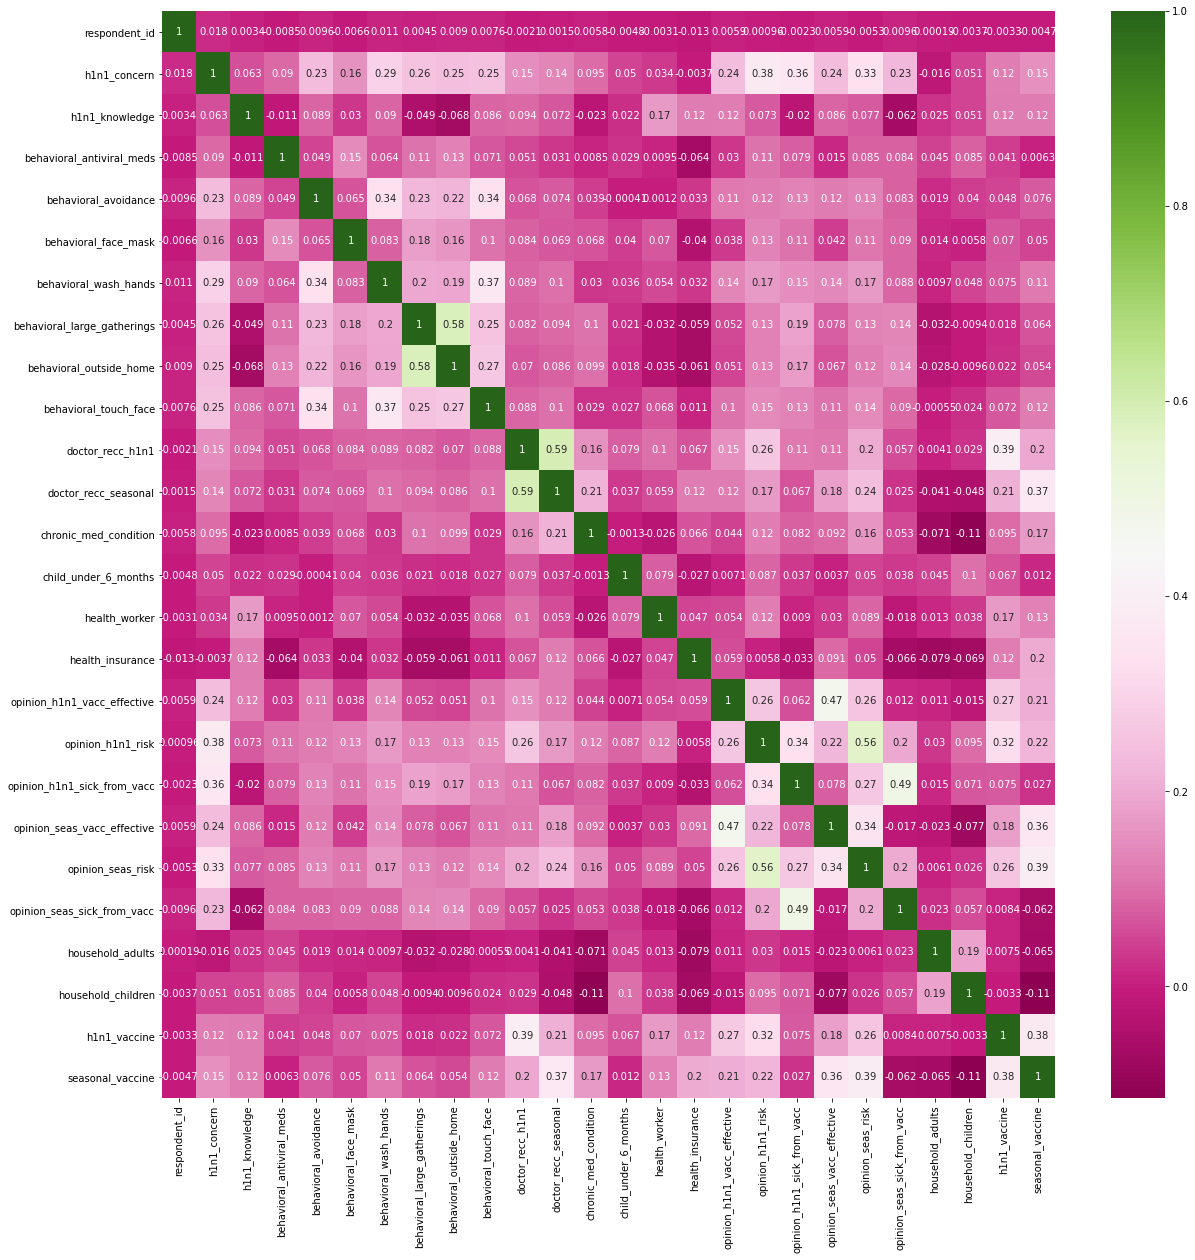

In [18]:
#get correlations of each features in dataset
corr = data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="PiYG")

F:\Anaconda\anaconda setup\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


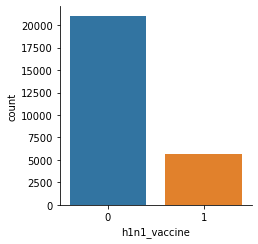

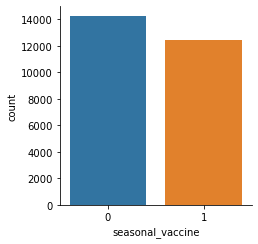

In [19]:
# Checking values for target
sb.catplot('h1n1_vaccine',data=data,kind='count',size = 3.5)
sb.catplot('seasonal_vaccine',data=data,kind='count',size = 3.5)

In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

- Following plot are showing relation b/w target variable and significant features of dataset

In [20]:
# Define list of significant features 
List = ['h1n1_concern','h1n1_knowledge','doctor_recc_h1n1','doctor_recc_seasonal',
        'opinion_h1n1_risk','opinion_seas_risk','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc',
        'opinion_h1n1_vacc_effective','opinion_seas_vacc_effective','health_insurance']

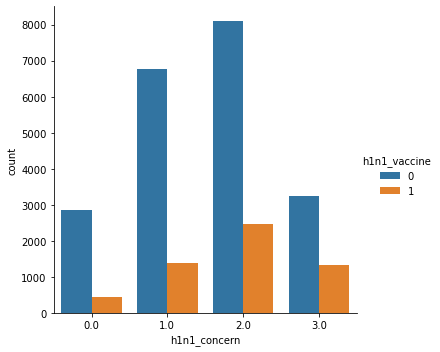

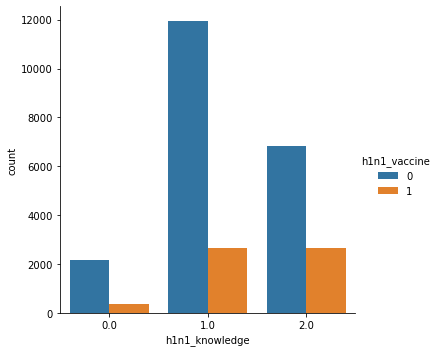

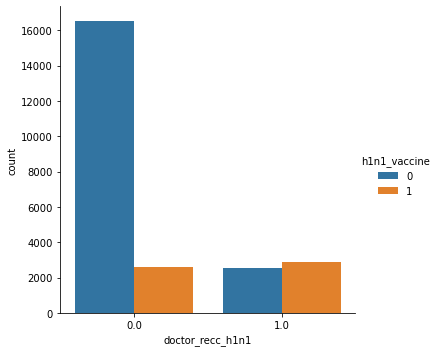

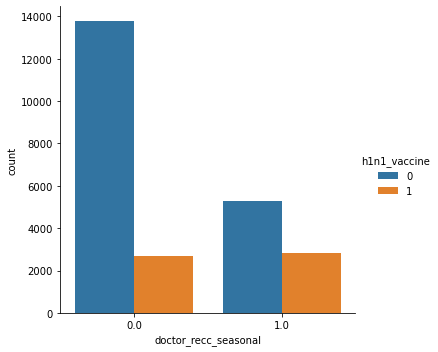

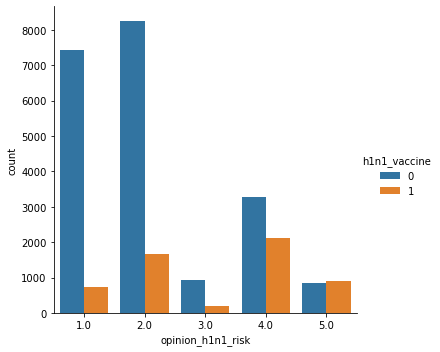

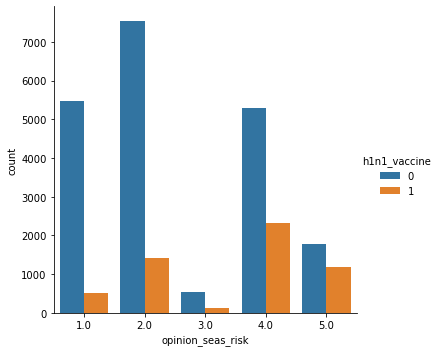

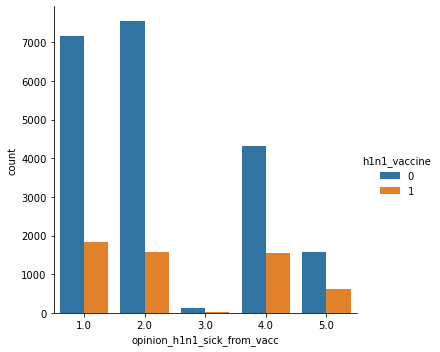

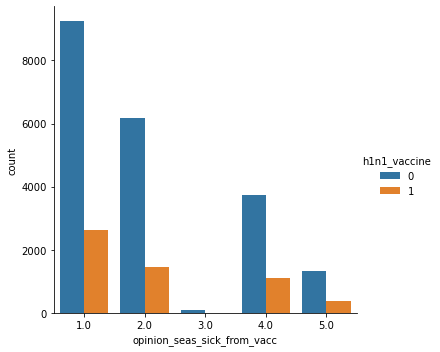

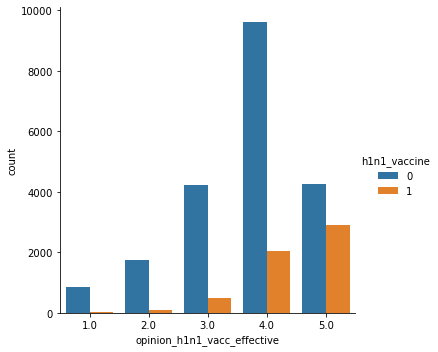

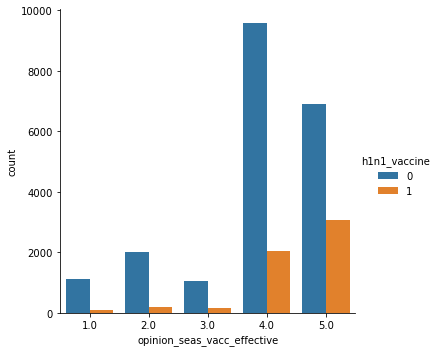

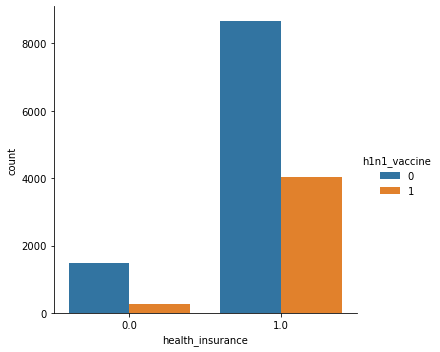

In [21]:
# passing list to for loop for h1n1_vaccine visualization
for i in List:
    sb.catplot(x=i,hue='h1n1_vaccine',data=data,kind='count',size = 5)

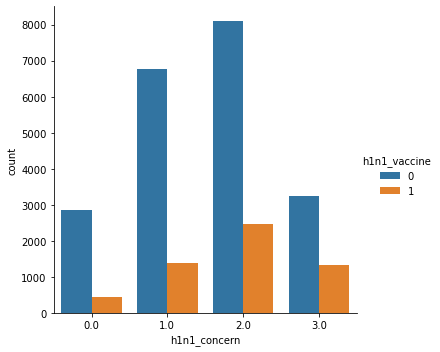

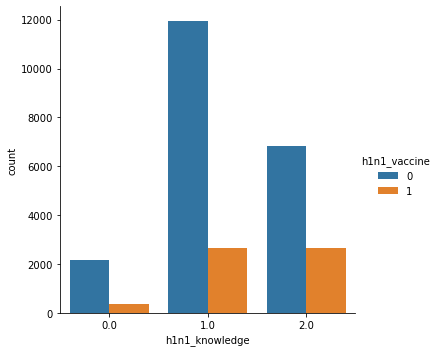

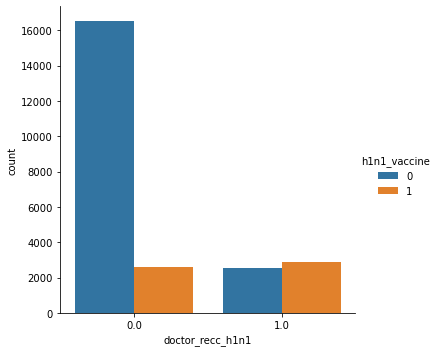

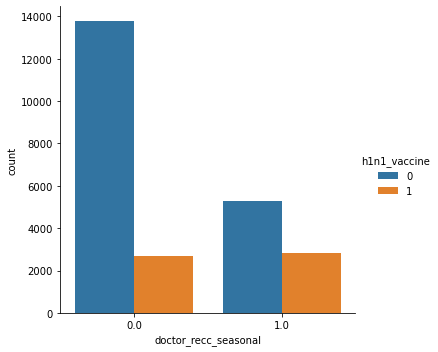

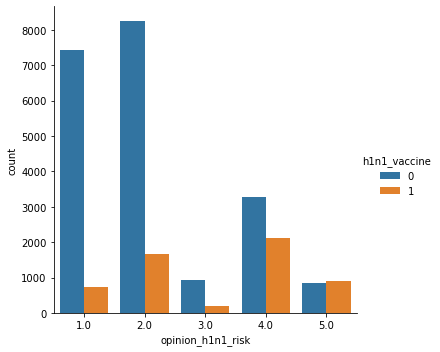

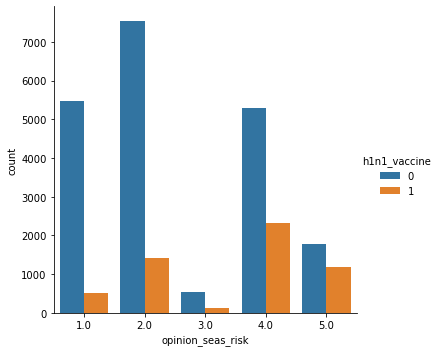

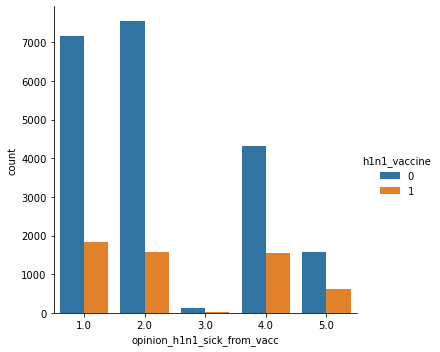

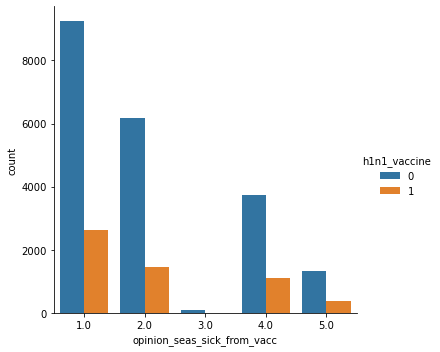

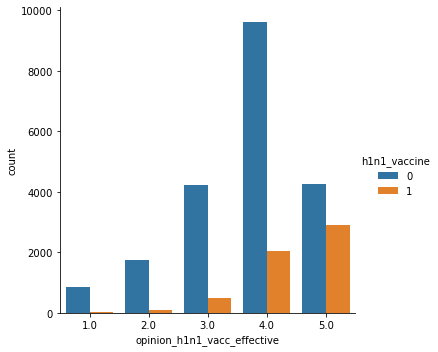

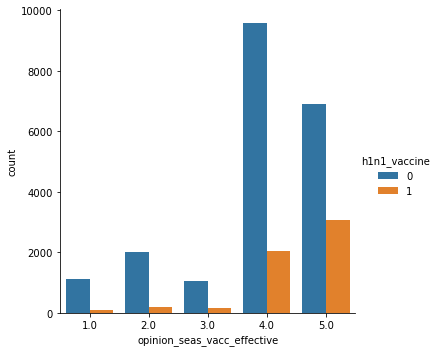

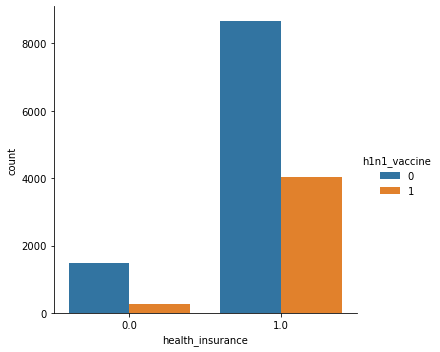

In [22]:
for i in List:
    sb.catplot(x=i,hue='h1n1_vaccine',data=data,kind='count',size = 5)

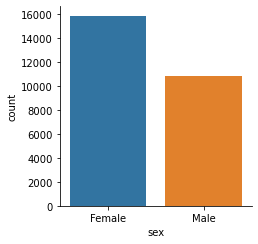

In [23]:
# The gender distribution of the data
sb.catplot('sex',data=data,kind='count',size = 3.5)

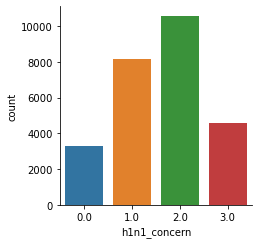

In [24]:
# The number of people in each category of concern
sb.catplot('h1n1_concern',kind = 'count',data = data, size = 3.5)

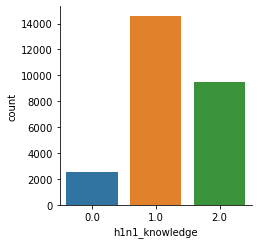

In [25]:
sb.catplot('h1n1_knowledge',kind = 'count',data = data, size = 3.5)

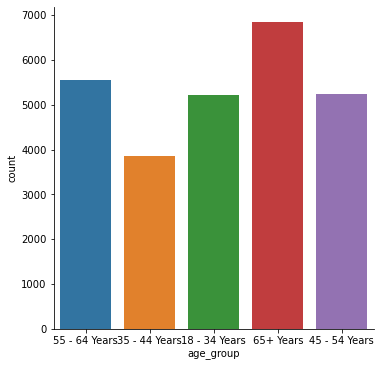

In [26]:
sb.catplot('age_group',kind = 'count',data = data, size = 5.2)

### 1. Data Cleaning and Preprocessing: 

##### 1.1. Impuating missing values for categorical feature 

In [27]:
# check impuation for categorical variable
data_cat = data.select_dtypes(include='object')
data_cat.head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married         Own  Not in Labor Force       oxchjgsf   
1    Not Married        Rent            Employed       bhuqouqj   
2    Not Married         Own            Employed       qufhixun   
3    Not Married        Rent  Not in Labor Force       lrircsnp   
4        Married         Own            Employed       qufhixun   

                 census_msa employment_industry employment_occupation  
0                   Non-MSA                 NaN                   NaN  
1  MSA, Not Principle  City            pxcmvdjn              xgwztkwe  
2  MSA, Not Principle  City            rucpziij              xtkaffoo  
3       MSA, Principle City                 NaN                   NaN  
4  MSA, Not Principle  City            wxleyezf              emcorrxb

- These are categorical feature in dataset

In [28]:
# check nan values in categorical features
data_cat.isnull().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

- Impuating values inplace of nan values for categorical feature for 'education'

In [29]:
data_cat.loc[data['education'].isnull()==True]

age_group education               race     sex  \
24     18 - 34 Years       NaN              Black    Male   
29         65+ Years       NaN              White  Female   
64     45 - 54 Years       NaN  Other or Multiple  Female   
68         65+ Years       NaN              White  Female   
75     45 - 54 Years       NaN              White    Male   
...              ...       ...                ...     ...   
26549  35 - 44 Years       NaN              White  Female   
26608      65+ Years       NaN  Other or Multiple  Female   
26639      65+ Years       NaN           Hispanic    Male   
26672  18 - 34 Years       NaN              Black  Female   
26675  45 - 54 Years       NaN              White    Male   

                  income_poverty marital_status rent_or_own  \
24                           NaN    Not Married         Own   
29     <= $75,000, Above Poverty    Not Married         Own   
64                           NaN            NaN         NaN   
68                           NaN            NaN         Own   
75                           NaN            NaN         NaN   
...                          ...            ...         ...   
26549                        NaN            NaN         NaN   
26608                        NaN            NaN         NaN   
26639  <= $75,000, Above Poverty    Not Married         Own   
26672                        NaN            NaN         NaN   
26675                        NaN            NaN         NaN   

        employment_status hhs_geo_region                census_msa  \
24             Unemployed       oxchjgsf                   Non-MSA   
29     Not in Labor Force       lrircsnp  MSA, Not Principle  City   
64                    NaN       kbazzjca                   Non-MSA   
68     Not in Labor Force       oxchjgsf                   Non-MSA   
75                    NaN       oxchjgsf  MSA, Not Principle  City   
...                   ...            ...                       ...   
26549                 NaN       oxchjgsf                   Non-MSA   
26608                 NaN       lrircsnp  MSA, Not Principle  City   
26639  Not in Labor Force       lrircsnp       MSA, Principle City   
26672                 NaN       fpwskwrf       MSA, Principle City   
26675                 NaN       kbazzjca                   Non-MSA   

      employment_industry employment_occupation  
24                    NaN                   NaN  
29                    NaN                   NaN  
64                    NaN                   NaN  
68                    NaN                   NaN  
75                    NaN                   NaN  
...                   ...                   ...  
26549                 NaN                   NaN  
26608                 NaN                   NaN  
26639                 NaN                   NaN  
26672                 NaN                   NaN  
26675                 NaN                   NaN  

[1407 rows x 12 columns]

In [30]:
data.education.value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
NaN                  1407
Name: education, dtype: int64

In [31]:
## since we have significant numbers of nan so we can create a new category called as others as we cannot comment about other levels of education
data.loc[data['education'].isnull()==True,'education']='Others'

In [32]:
data.education.value_counts(dropna=False)

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Others               1407
Name: education, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'income_poverty'

In [33]:
data_cat.loc[data['income_poverty'].isnull()==True]

age_group         education               race     sex  \
24     18 - 34 Years               NaN              Black    Male   
26     45 - 54 Years  College Graduate              White  Female   
31     18 - 34 Years      Some College  Other or Multiple  Female   
38         65+ Years  College Graduate              White    Male   
39         65+ Years        < 12 Years              White  Female   
...              ...               ...                ...     ...   
26667  35 - 44 Years          12 Years              White    Male   
26672  18 - 34 Years               NaN              Black  Female   
26675  45 - 54 Years               NaN              White    Male   
26696  45 - 54 Years      Some College              White    Male   
26704  55 - 64 Years      Some College              White  Female   

      income_poverty marital_status rent_or_own   employment_status  \
24               NaN    Not Married         Own          Unemployed   
26               NaN        Married         NaN            Employed   
31               NaN    Not Married         Own  Not in Labor Force   
38               NaN        Married         Own  Not in Labor Force   
39               NaN    Not Married         Own            Employed   
...              ...            ...         ...                 ...   
26667            NaN    Not Married        Rent          Unemployed   
26672            NaN            NaN         NaN                 NaN   
26675            NaN            NaN         NaN                 NaN   
26696            NaN        Married         Own            Employed   
26704            NaN    Not Married         Own                 NaN   

      hhs_geo_region                census_msa employment_industry  \
24          oxchjgsf                   Non-MSA                 NaN   
26          mlyzmhmf       MSA, Principle City            ldnlellj   
31          mlyzmhmf  MSA, Not Principle  City                 NaN   
38          bhuqouqj  MSA, Not Principle  City                 NaN   
39          qufhixun  MSA, Not Principle  City            pxcmvdjn   
...              ...                       ...                 ...   
26667       dqpwygqj  MSA, Not Principle  City                 NaN   
26672       fpwskwrf       MSA, Principle City                 NaN   
26675       kbazzjca                   Non-MSA                 NaN   
26696       bhuqouqj       MSA, Principle City            saaquncn   
26704       lzgpxyit  MSA, Not Principle  City                 NaN   

      employment_occupation  
24                      NaN  
26                 hfxkjkmi  
31                      NaN  
38                      NaN  
39                 xgwztkwe  
...                     ...  
26667                   NaN  
26672                   NaN  
26675                   NaN  
26696              mxkfnird  
26704                   NaN  

[4423 rows x 12 columns]

In [34]:
data.income_poverty.value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
NaN                           4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [35]:
## since missing values are significant so lets impute others
data.loc[data['income_poverty'].isnull()==True,'income_poverty']='Other'

In [36]:
data.income_poverty.value_counts(dropna=False)

<= $75,000, Above Poverty    12777
> $75,000                     6810
Other                         4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'matrital_status'

In [37]:
data_cat.loc[data['marital_status'].isnull()==True]

age_group     education               race     sex income_poverty  \
64     45 - 54 Years           NaN  Other or Multiple  Female            NaN   
68         65+ Years           NaN              White  Female            NaN   
75     45 - 54 Years           NaN              White    Male            NaN   
94     35 - 44 Years           NaN           Hispanic  Female            NaN   
105    35 - 44 Years           NaN              White  Female            NaN   
...              ...           ...                ...     ...            ...   
26549  35 - 44 Years           NaN              White  Female            NaN   
26565  18 - 34 Years  Some College              White    Male            NaN   
26608      65+ Years           NaN  Other or Multiple  Female            NaN   
26672  18 - 34 Years           NaN              Black  Female            NaN   
26675  45 - 54 Years           NaN              White    Male            NaN   

      marital_status rent_or_own   employment_status hhs_geo_region  \
64               NaN         NaN                 NaN       kbazzjca   
68               NaN         Own  Not in Labor Force       oxchjgsf   
75               NaN         NaN                 NaN       oxchjgsf   
94               NaN         NaN                 NaN       kbazzjca   
105              NaN         NaN                 NaN       oxchjgsf   
...              ...         ...                 ...            ...   
26549            NaN         NaN                 NaN       oxchjgsf   
26565            NaN         NaN                 NaN       fpwskwrf   
26608            NaN         NaN                 NaN       lrircsnp   
26672            NaN         NaN                 NaN       fpwskwrf   
26675            NaN         NaN                 NaN       kbazzjca   

                     census_msa employment_industry employment_occupation  
64                      Non-MSA                 NaN                   NaN  
68                      Non-MSA                 NaN                   NaN  
75     MSA, Not Principle  City                 NaN                   NaN  
94     MSA, Not Principle  City                 NaN                   NaN  
105    MSA, Not Principle  City                 NaN                   NaN  
...                         ...                 ...                   ...  
26549                   Non-MSA                 NaN                   NaN  
26565  MSA, Not Principle  City                 NaN                   NaN  
26608  MSA, Not Principle  City                 NaN                   NaN  
26672       MSA, Principle City                 NaN                   NaN  
26675                   Non-MSA                 NaN                   NaN  

[1408 rows x 12 columns]

In [38]:
data.marital_status.value_counts(dropna=False)

Married        13555
Not Married    11744
NaN             1408
Name: marital_status, dtype: int64

In [39]:
## since missing values are significant and person can either married or unmarried so lets impute  Not Married 
data.loc[data['marital_status'].isnull()==True,'marital_status']='Not Married'

In [40]:
data.marital_status.value_counts(dropna=False)

Married        13555
Not Married    13152
Name: marital_status, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'rent_or_own'

In [41]:
data_cat.loc[data['rent_or_own'].isnull()==True]

age_group         education   race     sex  \
16         65+ Years          12 Years  White  Female   
26     45 - 54 Years  College Graduate  White  Female   
56         65+ Years          12 Years  White  Female   
57     55 - 64 Years        < 12 Years  White    Male   
63     18 - 34 Years          12 Years  White    Male   
...              ...               ...    ...     ...   
26620  55 - 64 Years  College Graduate  White  Female   
26631      65+ Years      Some College  White    Male   
26633      65+ Years          12 Years  White    Male   
26672  18 - 34 Years               NaN  Black  Female   
26675  45 - 54 Years               NaN  White    Male   

                  income_poverty marital_status rent_or_own  \
16     <= $75,000, Above Poverty        Married         NaN   
26                           NaN        Married         NaN   
56     <= $75,000, Above Poverty    Not Married         NaN   
57                           NaN        Married         NaN   
63                           NaN    Not Married         NaN   
...                          ...            ...         ...   
26620  <= $75,000, Above Poverty        Married         NaN   
26631                        NaN    Not Married         NaN   
26633                        NaN        Married         NaN   
26672                        NaN            NaN         NaN   
26675                        NaN            NaN         NaN   

        employment_status hhs_geo_region           census_msa  \
16     Not in Labor Force       oxchjgsf  MSA, Principle City   
26               Employed       mlyzmhmf  MSA, Principle City   
56               Employed       oxchjgsf              Non-MSA   
57               Employed       kbazzjca  MSA, Principle City   
63                    NaN       mlyzmhmf  MSA, Principle City   
...                   ...            ...                  ...   
26620            Employed       lrircsnp              Non-MSA   
26631  Not in Labor Force       oxchjgsf  MSA, Principle City   
26633  Not in Labor Force       oxchjgsf              Non-MSA   
26672                 NaN       fpwskwrf  MSA, Principle City   
26675                 NaN       kbazzjca              Non-MSA   

      employment_industry employment_occupation  
16                    NaN                   NaN  
26               ldnlellj              hfxkjkmi  
56               atmlpfrs              xqwwgdyp  
57               xicduogh              qxajmpny  
63                    NaN                   NaN  
...                   ...                   ...  
26620            nduyfdeo              xtkaffoo  
26631                 NaN                   NaN  
26633                 NaN                   NaN  
26672                 NaN                   NaN  
26675                 NaN                   NaN  

[2042 rows x 12 columns]

In [42]:
data.rent_or_own.value_counts(dropna=False)

Own     18736
Rent     5929
NaN      2042
Name: rent_or_own, dtype: int64

In [43]:
## since missing values are significant so lets impute  Not Married
data.loc[data['rent_or_own'].isnull()==True,'rent_or_own']='Other'

In [44]:
data.rent_or_own.value_counts(dropna=False)

Own      18736
Rent      5929
Other     2042
Name: rent_or_own, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'employment_status'

In [45]:
data_cat.loc[data['employment_status'].isnull()==True]

age_group         education               race     sex  \
63     18 - 34 Years          12 Years              White    Male   
64     45 - 54 Years               NaN  Other or Multiple  Female   
75     45 - 54 Years               NaN              White    Male   
94     35 - 44 Years               NaN           Hispanic  Female   
105    35 - 44 Years               NaN              White  Female   
...              ...               ...                ...     ...   
26643  35 - 44 Years  College Graduate              White  Female   
26672  18 - 34 Years               NaN              Black  Female   
26675  45 - 54 Years               NaN              White    Male   
26686  18 - 34 Years  College Graduate           Hispanic  Female   
26704  55 - 64 Years      Some College              White  Female   

      income_poverty marital_status rent_or_own employment_status  \
63               NaN    Not Married         NaN               NaN   
64               NaN            NaN         NaN               NaN   
75               NaN            NaN         NaN               NaN   
94               NaN            NaN         NaN               NaN   
105              NaN            NaN         NaN               NaN   
...              ...            ...         ...               ...   
26643            NaN        Married         Own               NaN   
26672            NaN            NaN         NaN               NaN   
26675            NaN            NaN         NaN               NaN   
26686  Below Poverty    Not Married         Own               NaN   
26704            NaN    Not Married         Own               NaN   

      hhs_geo_region                census_msa employment_industry  \
63          mlyzmhmf       MSA, Principle City                 NaN   
64          kbazzjca                   Non-MSA                 NaN   
75          oxchjgsf  MSA, Not Principle  City                 NaN   
94          kbazzjca  MSA, Not Principle  City                 NaN   
105         oxchjgsf  MSA, Not Principle  City                 NaN   
...              ...                       ...                 ...   
26643       qufhixun  MSA, Not Principle  City                 NaN   
26672       fpwskwrf       MSA, Principle City                 NaN   
26675       kbazzjca                   Non-MSA                 NaN   
26686       kbazzjca                   Non-MSA                 NaN   
26704       lzgpxyit  MSA, Not Principle  City                 NaN   

      employment_occupation  
63                      NaN  
64                      NaN  
75                      NaN  
94                      NaN  
105                     NaN  
...                     ...  
26643                   NaN  
26672                   NaN  
26675                   NaN  
26686                   NaN  
26704                   NaN  

[1463 rows x 12 columns]

In [46]:
data.employment_status.value_counts(dropna=False)

Employed              13560
Not in Labor Force    10231
NaN                    1463
Unemployed             1453
Name: employment_status, dtype: int64

In [47]:
data.loc[data['employment_status'].isnull()==True,'employment_status']='Others'

In [48]:
data.employment_status.value_counts(dropna=False)

Employed              13560
Not in Labor Force    10231
Others                 1463
Unemployed             1453
Name: employment_status, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'employment_industry'

In [49]:
data_cat.loc[data['employment_industry'].isnull()==True]

age_group         education   race     sex  \
0      55 - 64 Years        < 12 Years  White  Female   
3          65+ Years          12 Years  White  Female   
9      55 - 64 Years          12 Years  White    Male   
12         65+ Years  College Graduate  White    Male   
14     55 - 64 Years          12 Years  White    Male   
...              ...               ...    ...     ...   
26700  55 - 64 Years          12 Years  White  Female   
26701  18 - 34 Years  College Graduate  White  Female   
26702      65+ Years      Some College  White  Female   
26704  55 - 64 Years      Some College  White  Female   
26706      65+ Years      Some College  White    Male   

                  income_poverty marital_status rent_or_own  \
0                  Below Poverty    Not Married         Own   
3                  Below Poverty    Not Married        Rent   
9      <= $75,000, Above Poverty    Not Married         Own   
12     <= $75,000, Above Poverty        Married         Own   
14     <= $75,000, Above Poverty        Married         Own   
...                          ...            ...         ...   
26700                  > $75,000        Married         Own   
26701                  > $75,000    Not Married        Rent   
26702  <= $75,000, Above Poverty    Not Married         Own   
26704                        NaN    Not Married         Own   
26706  <= $75,000, Above Poverty        Married         Own   

        employment_status hhs_geo_region                census_msa  \
0      Not in Labor Force       oxchjgsf                   Non-MSA   
3      Not in Labor Force       lrircsnp       MSA, Principle City   
9      Not in Labor Force       qufhixun  MSA, Not Principle  City   
12     Not in Labor Force       lzgpxyit  MSA, Not Principle  City   
14     Not in Labor Force       qufhixun  MSA, Not Principle  City   
...                   ...            ...                       ...   
26700  Not in Labor Force       lzgpxyit       MSA, Principle City   
26701  Not in Labor Force       fpwskwrf       MSA, Principle City   
26702  Not in Labor Force       qufhixun                   Non-MSA   
26704                 NaN       lzgpxyit  MSA, Not Principle  City   
26706  Not in Labor Force       mlyzmhmf       MSA, Principle City   

      employment_industry employment_occupation  
0                     NaN                   NaN  
3                     NaN                   NaN  
9                     NaN                   NaN  
12                    NaN                   NaN  
14                    NaN                   NaN  
...                   ...                   ...  
26700                 NaN                   NaN  
26701                 NaN                   NaN  
26702                 NaN                   NaN  
26704                 NaN                   NaN  
26706                 NaN                   NaN  

[13330 rows x 12 columns]

In [50]:
data.employment_industry.value_counts(dropna=False)

NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [51]:
data.loc[data['employment_industry'].isnull()==True,'employment_industry']='Others'

In [52]:
data.employment_industry.value_counts(dropna=False)

Others      13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

- Impuating values inplace of nan values for categorical feature for 'employment_occupation'

In [53]:
data_cat.loc[data['employment_occupation'].isnull()==True]

age_group         education   race     sex  \
0      55 - 64 Years        < 12 Years  White  Female   
3          65+ Years          12 Years  White  Female   
9      55 - 64 Years          12 Years  White    Male   
12         65+ Years  College Graduate  White    Male   
14     55 - 64 Years          12 Years  White    Male   
...              ...               ...    ...     ...   
26700  55 - 64 Years          12 Years  White  Female   
26701  18 - 34 Years  College Graduate  White  Female   
26702      65+ Years      Some College  White  Female   
26704  55 - 64 Years      Some College  White  Female   
26706      65+ Years      Some College  White    Male   

                  income_poverty marital_status rent_or_own  \
0                  Below Poverty    Not Married         Own   
3                  Below Poverty    Not Married        Rent   
9      <= $75,000, Above Poverty    Not Married         Own   
12     <= $75,000, Above Poverty        Married         Own   
14     <= $75,000, Above Poverty        Married         Own   
...                          ...            ...         ...   
26700                  > $75,000        Married         Own   
26701                  > $75,000    Not Married        Rent   
26702  <= $75,000, Above Poverty    Not Married         Own   
26704                        NaN    Not Married         Own   
26706  <= $75,000, Above Poverty        Married         Own   

        employment_status hhs_geo_region                census_msa  \
0      Not in Labor Force       oxchjgsf                   Non-MSA   
3      Not in Labor Force       lrircsnp       MSA, Principle City   
9      Not in Labor Force       qufhixun  MSA, Not Principle  City   
12     Not in Labor Force       lzgpxyit  MSA, Not Principle  City   
14     Not in Labor Force       qufhixun  MSA, Not Principle  City   
...                   ...            ...                       ...   
26700  Not in Labor Force       lzgpxyit       MSA, Principle City   
26701  Not in Labor Force       fpwskwrf       MSA, Principle City   
26702  Not in Labor Force       qufhixun                   Non-MSA   
26704                 NaN       lzgpxyit  MSA, Not Principle  City   
26706  Not in Labor Force       mlyzmhmf       MSA, Principle City   

      employment_industry employment_occupation  
0                     NaN                   NaN  
3                     NaN                   NaN  
9                     NaN                   NaN  
12                    NaN                   NaN  
14                    NaN                   NaN  
...                   ...                   ...  
26700                 NaN                   NaN  
26701                 NaN                   NaN  
26702                 NaN                   NaN  
26704                 NaN                   NaN  
26706                 NaN                   NaN  

[13470 rows x 12 columns]

In [54]:
data.employment_occupation.value_counts(dropna=False)

NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

In [55]:
data.loc[data['employment_occupation'].isnull()==True,'employment_occupation']='Others'

In [56]:
data.employment_occupation.value_counts(dropna=False)

Others      13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

##### 1.2. Encode Categorical Feature Into Numerical Using One Hot Encoding

In [57]:
# categorical feature
data_cat.head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married         Own  Not in Labor Force       oxchjgsf   
1    Not Married        Rent            Employed       bhuqouqj   
2    Not Married         Own            Employed       qufhixun   
3    Not Married        Rent  Not in Labor Force       lrircsnp   
4        Married         Own            Employed       qufhixun   

                 census_msa employment_industry employment_occupation  
0                   Non-MSA                 NaN                   NaN  
1  MSA, Not Principle  City            pxcmvdjn              xgwztkwe  
2  MSA, Not Principle  City            rucpziij              xtkaffoo  
3       MSA, Principle City                 NaN                   NaN  
4  MSA, Not Principle  City            wxleyezf              emcorrxb

In [58]:
# All columns of categorical features
data_cat.keys()

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [59]:
# Getting dummy features
data_dmy = pd.get_dummies(data[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']], drop_first=True)
data_dmy

age_group_35 - 44 Years  age_group_45 - 54 Years  \
0                            0                        0   
1                            1                        0   
2                            0                        0   
3                            0                        0   
4                            0                        1   
...                        ...                      ...   
26702                        0                        0   
26703                        0                        0   
26704                        0                        0   
26705                        0                        0   
26706                        0                        0   

       age_group_55 - 64 Years  age_group_65+ Years  education_< 12 Years  \
0                            1                    0                     1   
1                            0                    0                     0   
2                            0                    0                     0   
3                            0                    1                     0   
4                            0                    0                     0   
...                        ...                  ...                   ...   
26702                        0                    1                     0   
26703                        0                    0                     0   
26704                        1                    0                     0   
26705                        0                    0                     0   
26706                        0                    1                     0   

       education_College Graduate  education_Others  education_Some College  \
0                               0                 0                       0   
1                               0                 0                       0   
2                               1                 0                       0   
3                               0                 0                       0   
4                               0                 0                       1   
...                           ...               ...                     ...   
26702                           0                 0                       1   
26703                           1                 0                       0   
26704                           0                 0                       1   
26705                           0                 0                       1   
26706                           0                 0                       1   

       race_Hispanic  race_Other or Multiple  ...  \
0                  0                       0  ...   
1                  0                       0  ...   
2                  0                       0  ...   
3                  0                       0  ...   
4                  0                       0  ...   
...              ...                     ...  ...   
26702              0                       0  ...   
26703              0                       0  ...   
26704              0                       0  ...   
26705              1                       0  ...   
26706              0                       0  ...   

       employment_occupation_qxajmpny  employment_occupation_rcertsgn  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
26702                               0                               0   
26703                               0                               0   
26704                               0                               0   
26705                               0                    

- These are Dummy features of dataset

In [60]:
# All columns with dummy features
data_dmy.keys()

Index(['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Others', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Other', 'marital_status_Not Married', 'rent_or_own_Own',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Others', 'employment_status_Unemployed',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_industry_arjwrbjb',
       'employment_industry_atmlpfrs',

- Keys of all dummy feature

In [61]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

In [62]:
onehot = OneHotEncoder(sparse=False, drop='if_binary')

In [63]:
# Transform all dummy features
one_hot_arr = onehot.fit_transform(data_dmy[['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Others', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Other', 'marital_status_Not Married', 'rent_or_own_Own',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Others', 'employment_status_Unemployed',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_industry_arjwrbjb',
       'employment_industry_atmlpfrs', 'employment_industry_cfqqtusy',
       'employment_industry_dotnnunm', 'employment_industry_fcxhlnwr',
       'employment_industry_haxffmxo', 'employment_industry_ldnlellj',
       'employment_industry_mcubkhph', 'employment_industry_mfikgejo',
       'employment_industry_msuufmds', 'employment_industry_nduyfdeo',
       'employment_industry_phxvnwax', 'employment_industry_pxcmvdjn',
       'employment_industry_qnlwzans', 'employment_industry_rucpziij',
       'employment_industry_saaquncn', 'employment_industry_vjjrobsf',
       'employment_industry_wlfvacwt', 'employment_industry_wxleyezf',
       'employment_industry_xicduogh', 'employment_industry_xqicxuve',
       'employment_occupation_bxpfxfdn', 'employment_occupation_ccgxvspp',
       'employment_occupation_cmhcxjea', 'employment_occupation_dcjcmpih',
       'employment_occupation_dlvbwzss', 'employment_occupation_emcorrxb',
       'employment_occupation_haliazsg', 'employment_occupation_hfxkjkmi',
       'employment_occupation_hodpvpew', 'employment_occupation_kldqjyjy',
       'employment_occupation_mxkfnird', 'employment_occupation_oijqvulv',
       'employment_occupation_pvmttkik', 'employment_occupation_qxajmpny',
       'employment_occupation_rcertsgn', 'employment_occupation_tfqavkke',
       'employment_occupation_ukymxvdu', 'employment_occupation_uqqtjvyb',
       'employment_occupation_vlluhbov', 'employment_occupation_xgwztkwe',
       'employment_occupation_xqwwgdyp', 'employment_occupation_xtkaffoo',
       'employment_occupation_xzmlyyjv']])
one_hot_arr

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Encode categorical features into numerical

In [64]:
# Succesfully encoded categorical features
one_hot_df = pd.DataFrame(one_hot_arr, columns=['age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Others', 'education_Some College', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Other', 'marital_status_Not Married', 'rent_or_own_Own',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Others', 'employment_status_Unemployed',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA', 'employment_industry_arjwrbjb',
       'employment_industry_atmlpfrs', 'employment_industry_cfqqtusy',
       'employment_industry_dotnnunm', 'employment_industry_fcxhlnwr',
       'employment_industry_haxffmxo', 'employment_industry_ldnlellj',
       'employment_industry_mcubkhph', 'employment_industry_mfikgejo',
       'employment_industry_msuufmds', 'employment_industry_nduyfdeo',
       'employment_industry_phxvnwax', 'employment_industry_pxcmvdjn',
       'employment_industry_qnlwzans', 'employment_industry_rucpziij',
       'employment_industry_saaquncn', 'employment_industry_vjjrobsf',
       'employment_industry_wlfvacwt', 'employment_industry_wxleyezf',
       'employment_industry_xicduogh', 'employment_industry_xqicxuve',
       'employment_occupation_bxpfxfdn', 'employment_occupation_ccgxvspp',
       'employment_occupation_cmhcxjea', 'employment_occupation_dcjcmpih',
       'employment_occupation_dlvbwzss', 'employment_occupation_emcorrxb',
       'employment_occupation_haliazsg', 'employment_occupation_hfxkjkmi',
       'employment_occupation_hodpvpew', 'employment_occupation_kldqjyjy',
       'employment_occupation_mxkfnird', 'employment_occupation_oijqvulv',
       'employment_occupation_pvmttkik', 'employment_occupation_qxajmpny',
       'employment_occupation_rcertsgn', 'employment_occupation_tfqavkke',
       'employment_occupation_ukymxvdu', 'employment_occupation_uqqtjvyb',
       'employment_occupation_vlluhbov', 'employment_occupation_xgwztkwe',
       'employment_occupation_xqwwgdyp', 'employment_occupation_xtkaffoo',
       'employment_occupation_xzmlyyjv'])
one_hot_df

age_group_35 - 44 Years  age_group_45 - 54 Years  \
0                          0.0                      0.0   
1                          1.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      1.0   
...                        ...                      ...   
26702                      0.0                      0.0   
26703                      0.0                      0.0   
26704                      0.0                      0.0   
26705                      0.0                      0.0   
26706                      0.0                      0.0   

       age_group_55 - 64 Years  age_group_65+ Years  education_< 12 Years  \
0                          1.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  0.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  0.0                   0.0   
...                        ...                  ...                   ...   
26702                      0.0                  1.0                   0.0   
26703                      0.0                  0.0                   0.0   
26704                      1.0                  0.0                   0.0   
26705                      0.0                  0.0                   0.0   
26706                      0.0                  1.0                   0.0   

       education_College Graduate  education_Others  education_Some College  \
0                             0.0               0.0                     0.0   
1                             0.0               0.0                     0.0   
2                             1.0               0.0                     0.0   
3                             0.0               0.0                     0.0   
4                             0.0               0.0                     1.0   
...                           ...               ...                     ...   
26702                         0.0               0.0                     1.0   
26703                         1.0               0.0                     0.0   
26704                         0.0               0.0                     1.0   
26705                         0.0               0.0                     1.0   
26706                         0.0               0.0                     1.0   

       race_Hispanic  race_Other or Multiple  ...  \
0                0.0                     0.0  ...   
1                0.0                     0.0  ...   
2                0.0                     0.0  ...   
3                0.0                     0.0  ...   
4                0.0                     0.0  ...   
...              ...                     ...  ...   
26702            0.0                     0.0  ...   
26703            0.0                     0.0  ...   
26704            0.0                     0.0  ...   
26705            1.0                     0.0  ...   
26706            0.0                     0.0  ...   

       employment_occupation_qxajmpny  employment_occupation_rcertsgn  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
26702                             0.0                             0.0   
26703                             0.0                             0.0   
26704                             0.0                             0.0   
26705                             0.0                    

##### 1.3. Replacing NaN Values with Mean 

In [65]:
# Numerical features in data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_numeric = data.select_dtypes(include=numerics)
data_numeric.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                    1.0  ...                          3.0                1.0   
1                    1.0  ...                          5.0                4.0   
2                    0.0  ...                          3.0                1.0   
3                    0.0  ...                          3.0                3.0   
4                    1.0  ...                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
0                1.0                          2.0               0.0   
1                2.0                          4.0               0.0   
2                1.0                          2.0               2.0   
3                4.0                          1.0               0.0   
4                1.0                          4.0               1.0   

   household_children  h1n1_vaccine  seasonal_vaccine  
0                 0.0             0                 0  
1                 0.0             0                 1  
2                 0.0             0                 0  
3                 0.0             0                 1  
4                 0.0             0                 0  

[5 rows x 26 columns]

In [66]:
# Check NaN Values for Numeric Data
data_numeric.isnull().sum().sum()

23219

- Total missing values in numerical feature

In [67]:
# Check NaN Values for Each Columns
data_numeric.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [68]:
# some imp values for all features
data_numeric.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  opinion_h1n1_vacc_effective  \
count           26579.000000  ...                 26316.000000   
mean                0.677264  ...                     3.850623   
std                 0.467531  ...                     1.007436   
min                 0.000000  ...                     1.000000   
25%                 0.000000  ...                     3.000000   
50%                 1.000000  ...                     4.000000   
75%                 1.000000  ...                     5.000000   
max                 1.000000  ...                     5.000000   

       opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
count       26319.000000                 26312.000000   
mean            2.342566                     2.357670   
std             1.285539                     1.362766   
min             1.000000                     1.000000   
25%             1.000000                     1.000000   
50%             2.000000                     2.000000   
75%             4.000000                     4.000000   
max             5.000000                     5.000000   

       opinion_seas_vacc_effective  opinion_seas_risk  \
count                 26245.000000       26193.000000   
mean                      4.025986           2.719162   
std                       1.086565           1.385055   
min                       1.000000           1.000000   
25%                       4.000000           2.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_seas_sick_from_vacc  household_adults  household_children  \
count                 26170.000000      26458.000000        26458.000000   
mean                      2.118112          0.886499            0.534583   
std                       1.332950          0.753422            0.928173   
min                       1.000000          0.000000            0.000000   
25%                  

In [69]:
# replacing nan value with the mean value
data_numeric.fillna(value=data.mean(), inplace=True)

F:\Anaconda\anaconda setup\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
# succesfully removed all nan values
data_numeric.isnull().sum().sum()

0

- Replaced NaN values with mean value

##### 1.4. Check for Outliers

In [71]:
# Calculating Z_score
data_numeric
z_score=np.abs(stats.zscore(data_numeric))
z_score

array([[1.73198595, 0.68060883, 2.04692846, ..., 0.57866659, 0.51939056,
        0.93342725],
       [1.73185625, 1.5202786 , 1.19564718, ..., 0.57866659, 0.51939056,
        1.07132077],
       [1.73172654, 0.68060883, 0.42564064, ..., 0.57866659, 0.51939056,
        0.93342725],
       ...,
       [1.73172654, 0.41983489, 1.19564718, ..., 0.57866659, 0.51939056,
        1.07132077],
       [1.73185625, 0.68060883, 0.42564064, ..., 0.57866659, 0.51939056,
        0.93342725],
       [1.73198595, 1.78105254, 2.04692846, ..., 0.57866659, 0.51939056,
        0.93342725]])

In [72]:
# Set threshold
threshold=3

In [73]:
# Detecting Outliers
out= np.where(z_score > threshold)
out

(array([   10,    10,    13, ..., 26701, 26704, 26705], dtype=int64),
 array([13, 15, 13, ..., 13,  5, 15], dtype=int64))

In [74]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']

In [75]:
outlier

Row  Column
0        10      13
1        10      15
2        13      13
3        17      15
4        20       5
...     ...     ...
7011  26691       5
7012  26693       3
7013  26701      13
7014  26704       5
7015  26705      15

[7016 rows x 2 columns]

In [76]:
outlier.Column.value_counts()

13    2138
5     1841
15    1736
3     1301
Name: Column, dtype: int64

In [77]:
data_numeric.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

- Only 4 Columns Contains Outliers
 - 3=behavioral_antiviral_meds
 - 5=behavioral_face_mask
 - 13=child_under_6_months
 - 15=health_insurance

##### Outliers visualization and treating

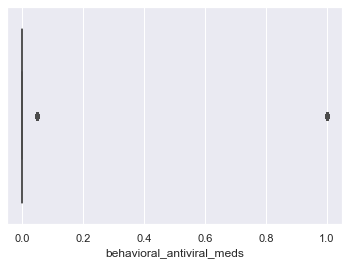

In [78]:
# plotting boxplot for all outliers
sb.set(style="darkgrid")
sb.boxplot(x=data_numeric['behavioral_antiviral_meds'])

In [79]:
Q1,Q3 = np.percentile(data_numeric['behavioral_antiviral_meds'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
beh = data_numeric['behavioral_antiviral_meds'].mean()
print("Mean Value of behavioral_antiviral_meds Feature = ",beh)

Q1 =  0.0
Q3 =  0.0
IQR =  0.0
Lower Bound =  0.0
Upper Bound =  0.0
Mean Value of behavioral_antiviral_meds Feature =  0.04884367022075391


In [80]:
data_numeric['behavioral_antiviral_meds'] = np.where(data_numeric['behavioral_antiviral_meds'] < 0, 0.04884367022075391,data_numeric['behavioral_antiviral_meds'])
data_numeric['behavioral_antiviral_meds'] = np.where(data_numeric['behavioral_antiviral_meds'] > 0, 0.04884367022075391,data_numeric['behavioral_antiviral_meds'])

<ipython-input-80-49c5fd1f9ac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['behavioral_antiviral_meds'] = np.where(data_numeric['behavioral_antiviral_meds'] < 0, 0.04884367022075391,data_numeric['behavioral_antiviral_meds'])
<ipython-input-80-49c5fd1f9ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['behavioral_antiviral_meds'] = np.where(data_numeric['behavioral_antiviral_meds'] > 0, 0.04884367022075391,data_numeric['behavioral_antiviral_meds'])


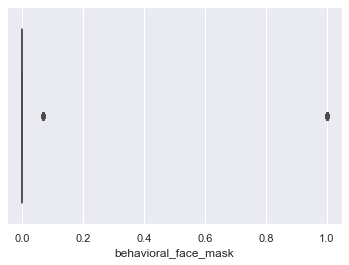

In [81]:
# plotting boxplot for all outliers
sb.set(style="darkgrid")
sb.boxplot(x=data_numeric['behavioral_face_mask'])

In [82]:
Q1,Q3 = np.percentile(data_numeric['behavioral_face_mask'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
mask = data_numeric['behavioral_face_mask'].mean()
print("Mean Value of behavioral_face_mask Feature = ",mask)

Q1 =  0.0
Q3 =  0.0
IQR =  0.0
Lower Bound =  0.0
Upper Bound =  0.0
Mean Value of behavioral_face_mask Feature =  0.06898231414868101


In [83]:
data_numeric['behavioral_face_mask'] = np.where(data_numeric['behavioral_face_mask'] < 0, 0.06898231414868101,data_numeric['behavioral_face_mask'])
data_numeric['behavioral_face_mask'] = np.where(data_numeric['behavioral_face_mask'] > 0, 0.06898231414868101,data_numeric['behavioral_face_mask'])

<ipython-input-83-ea6e33e00ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['behavioral_face_mask'] = np.where(data_numeric['behavioral_face_mask'] < 0, 0.06898231414868101,data_numeric['behavioral_face_mask'])
<ipython-input-83-ea6e33e00ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['behavioral_face_mask'] = np.where(data_numeric['behavioral_face_mask'] > 0, 0.06898231414868101,data_numeric['behavioral_face_mask'])


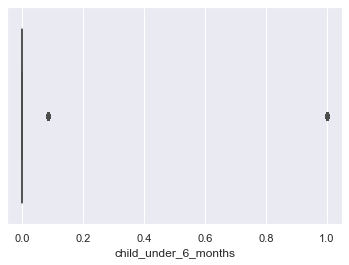

In [84]:
# plotting boxplot for all outliers
sb.set(style="darkgrid")
sb.boxplot(x=data_numeric['child_under_6_months'])

In [85]:
Q1,Q3 = np.percentile(data_numeric['child_under_6_months'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
mon = data_numeric['child_under_6_months'].mean()
print("Mean Value of child_under_6_months Feature = ",mon)

Q1 =  0.0
Q3 =  0.0
IQR =  0.0
Lower Bound =  0.0
Upper Bound =  0.0
Mean Value of child_under_6_months Feature =  0.08258971684629367


In [86]:
data_numeric['child_under_6_months'] = np.where(data_numeric['child_under_6_months'] < 0, 0.08258971684629367,data_numeric['child_under_6_months'])
data_numeric['child_under_6_months'] = np.where(data_numeric['child_under_6_months'] > 0, 0.08258971684629367,data_numeric['child_under_6_months'])

<ipython-input-86-a48f89b2206d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['child_under_6_months'] = np.where(data_numeric['child_under_6_months'] < 0, 0.08258971684629367,data_numeric['child_under_6_months'])
<ipython-input-86-a48f89b2206d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['child_under_6_months'] = np.where(data_numeric['child_under_6_months'] > 0, 0.08258971684629367,data_numeric['child_under_6_months'])


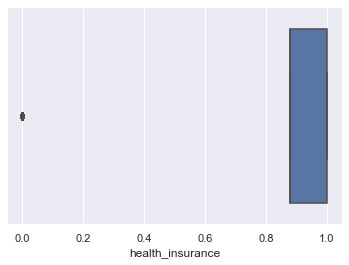

In [87]:
# plotting boxplot for all outliers
sb.set(style="darkgrid")
sb.boxplot(x=data_numeric['health_insurance'])

In [88]:
Q1,Q3 = np.percentile(data_numeric['health_insurance'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
hel = data_numeric['health_insurance'].mean()
print("Mean Value of health_insurance Feature = ",hel)

Q1 =  0.8797200859142243
Q3 =  1.0
IQR =  0.12027991408577565
Lower Bound =  0.6993002147855609
Upper Bound =  1.1804198711286635
Mean Value of health_insurance Feature =  0.8797200859142815


In [89]:
data_numeric['health_insurance'] = np.where(data_numeric['health_insurance'] < 0.6993002147855609, 0.8797200859142815,data_numeric['health_insurance'])
data_numeric['health_insurance'] = np.where(data_numeric['health_insurance'] > 1.1804198711286635, 0.8797200859142815,data_numeric['health_insurance'])

<ipython-input-89-f817e1a6da46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['health_insurance'] = np.where(data_numeric['health_insurance'] < 0.6993002147855609, 0.8797200859142815,data_numeric['health_insurance'])
<ipython-input-89-f817e1a6da46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['health_insurance'] = np.where(data_numeric['health_insurance'] > 1.1804198711286635, 0.8797200859142815,data_numeric['health_insurance'])


- Succesfully Removed All The Outliers
- Replaced Ouliers with Mean Value

##### Joining the data_numeric & one_hot_df(encoded data) in a single dataframe

In [90]:
# spliting target feature from numeric data
data_num2 = data_numeric.iloc[:,-2:]
data_num2

h1n1_vaccine  seasonal_vaccine
0                 0                 0
1                 0                 1
2                 0                 0
3                 0                 1
4                 0                 0
...             ...               ...
26702             0                 0
26703             0                 0
26704             0                 1
26705             0                 0
26706             0                 0

[26707 rows x 2 columns]

In [91]:
# Droping target feature from numerical data
data_num1 = data_numeric
data_num1.drop(['h1n1_vaccine','seasonal_vaccine'],axis = 1,inplace = True)
data_num1

F:\Anaconda\anaconda setup\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0              0.000000                    0.0   
1                       1.0              0.000000                    1.0   
2                       1.0              0.000000                    0.0   
3                       1.0              0.000000                    1.0   
4                       1.0              0.000000                    1.0   
...                     ...                   ...                    ...   
26702                   1.0              0.000000                    0.0   
26703                   1.0              0.000000                    1.0   
26704                   1.0              0.068982                    1.0   
26705                   0.0              0.000000                    0.0   
26706                   1.0              0.000000                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  health_worker  health_insurance  \
0                   1.000000  ...            0.0           1.00000   
1                   1.000000  ...            0.0           1.00000   
2                   0.000000  ...            0.0           0.87972   
3                   0.000000  ...            0.0           0.87972   
4                   1.000000  ...            0.0           0.87972   
...                      ...  ...            ...               ...   
26702               0.000000  ...            0.0           0.87972   
26703               0.000000  ...            1.0           1.00000   
26704               1.000000  ...            0.0           0.87972   
26705               0.677264  ...            0.0           0.87972   
26706               0.000000  ...            0.0           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              3.0                1.0   
1                              5.0                4.0   
2                              3.0                1.0   
3                              3.0                3.0   
4                              3.0                3.0   
...                            ...                ...   
26702                          3.0                1.0   
26703                          4.0                2.0   
26704     

In [92]:
# Creating dataframe(new_data) and set position of numeric,encoded and target respectivelly in new_data
frames = [data_num1,one_hot_df,data_num2]
new_data = pd.concat(frames,axis=1)
new_data

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0              0.000000                    0.0   
1                       1.0              0.000000                    1.0   
2                       1.0              0.000000                    0.0   
3                       1.0              0.000000                    1.0   
4                       1.0              0.000000                    1.0   
...                     ...                   ...                    ...   
26702                   1.0              0.000000                    0.0   
26703                   1.0              0.000000                    1.0   
26704                   1.0              0.068982                    1.0   
26705                   0.0              0.000000                    0.0   
26706                   1.0              0.000000                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  employment_occupation_tfqavkke  \
0                   1.000000  ...                             0.0   
1                   1.000000  ...                             0.0   
2                   0.000000  ...                             0.0   
3                   0.000000  ...                             0.0   
4                   1.000000  ...                             0.0   
...                      ...  ...                             ...   
26702               0.000000  ...                             0.0   
26703               0.000000  ...                             0.0   
26704               1.000000  ...                             0.0   
26705               0.677264  ...                             0.0   
26706               0.000000  ...                             0.0   

       employment_occupation_ukymxvdu  employment_occupation_uqqtjvyb  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
26702                   

### Feature Engg

##### Feature Selection

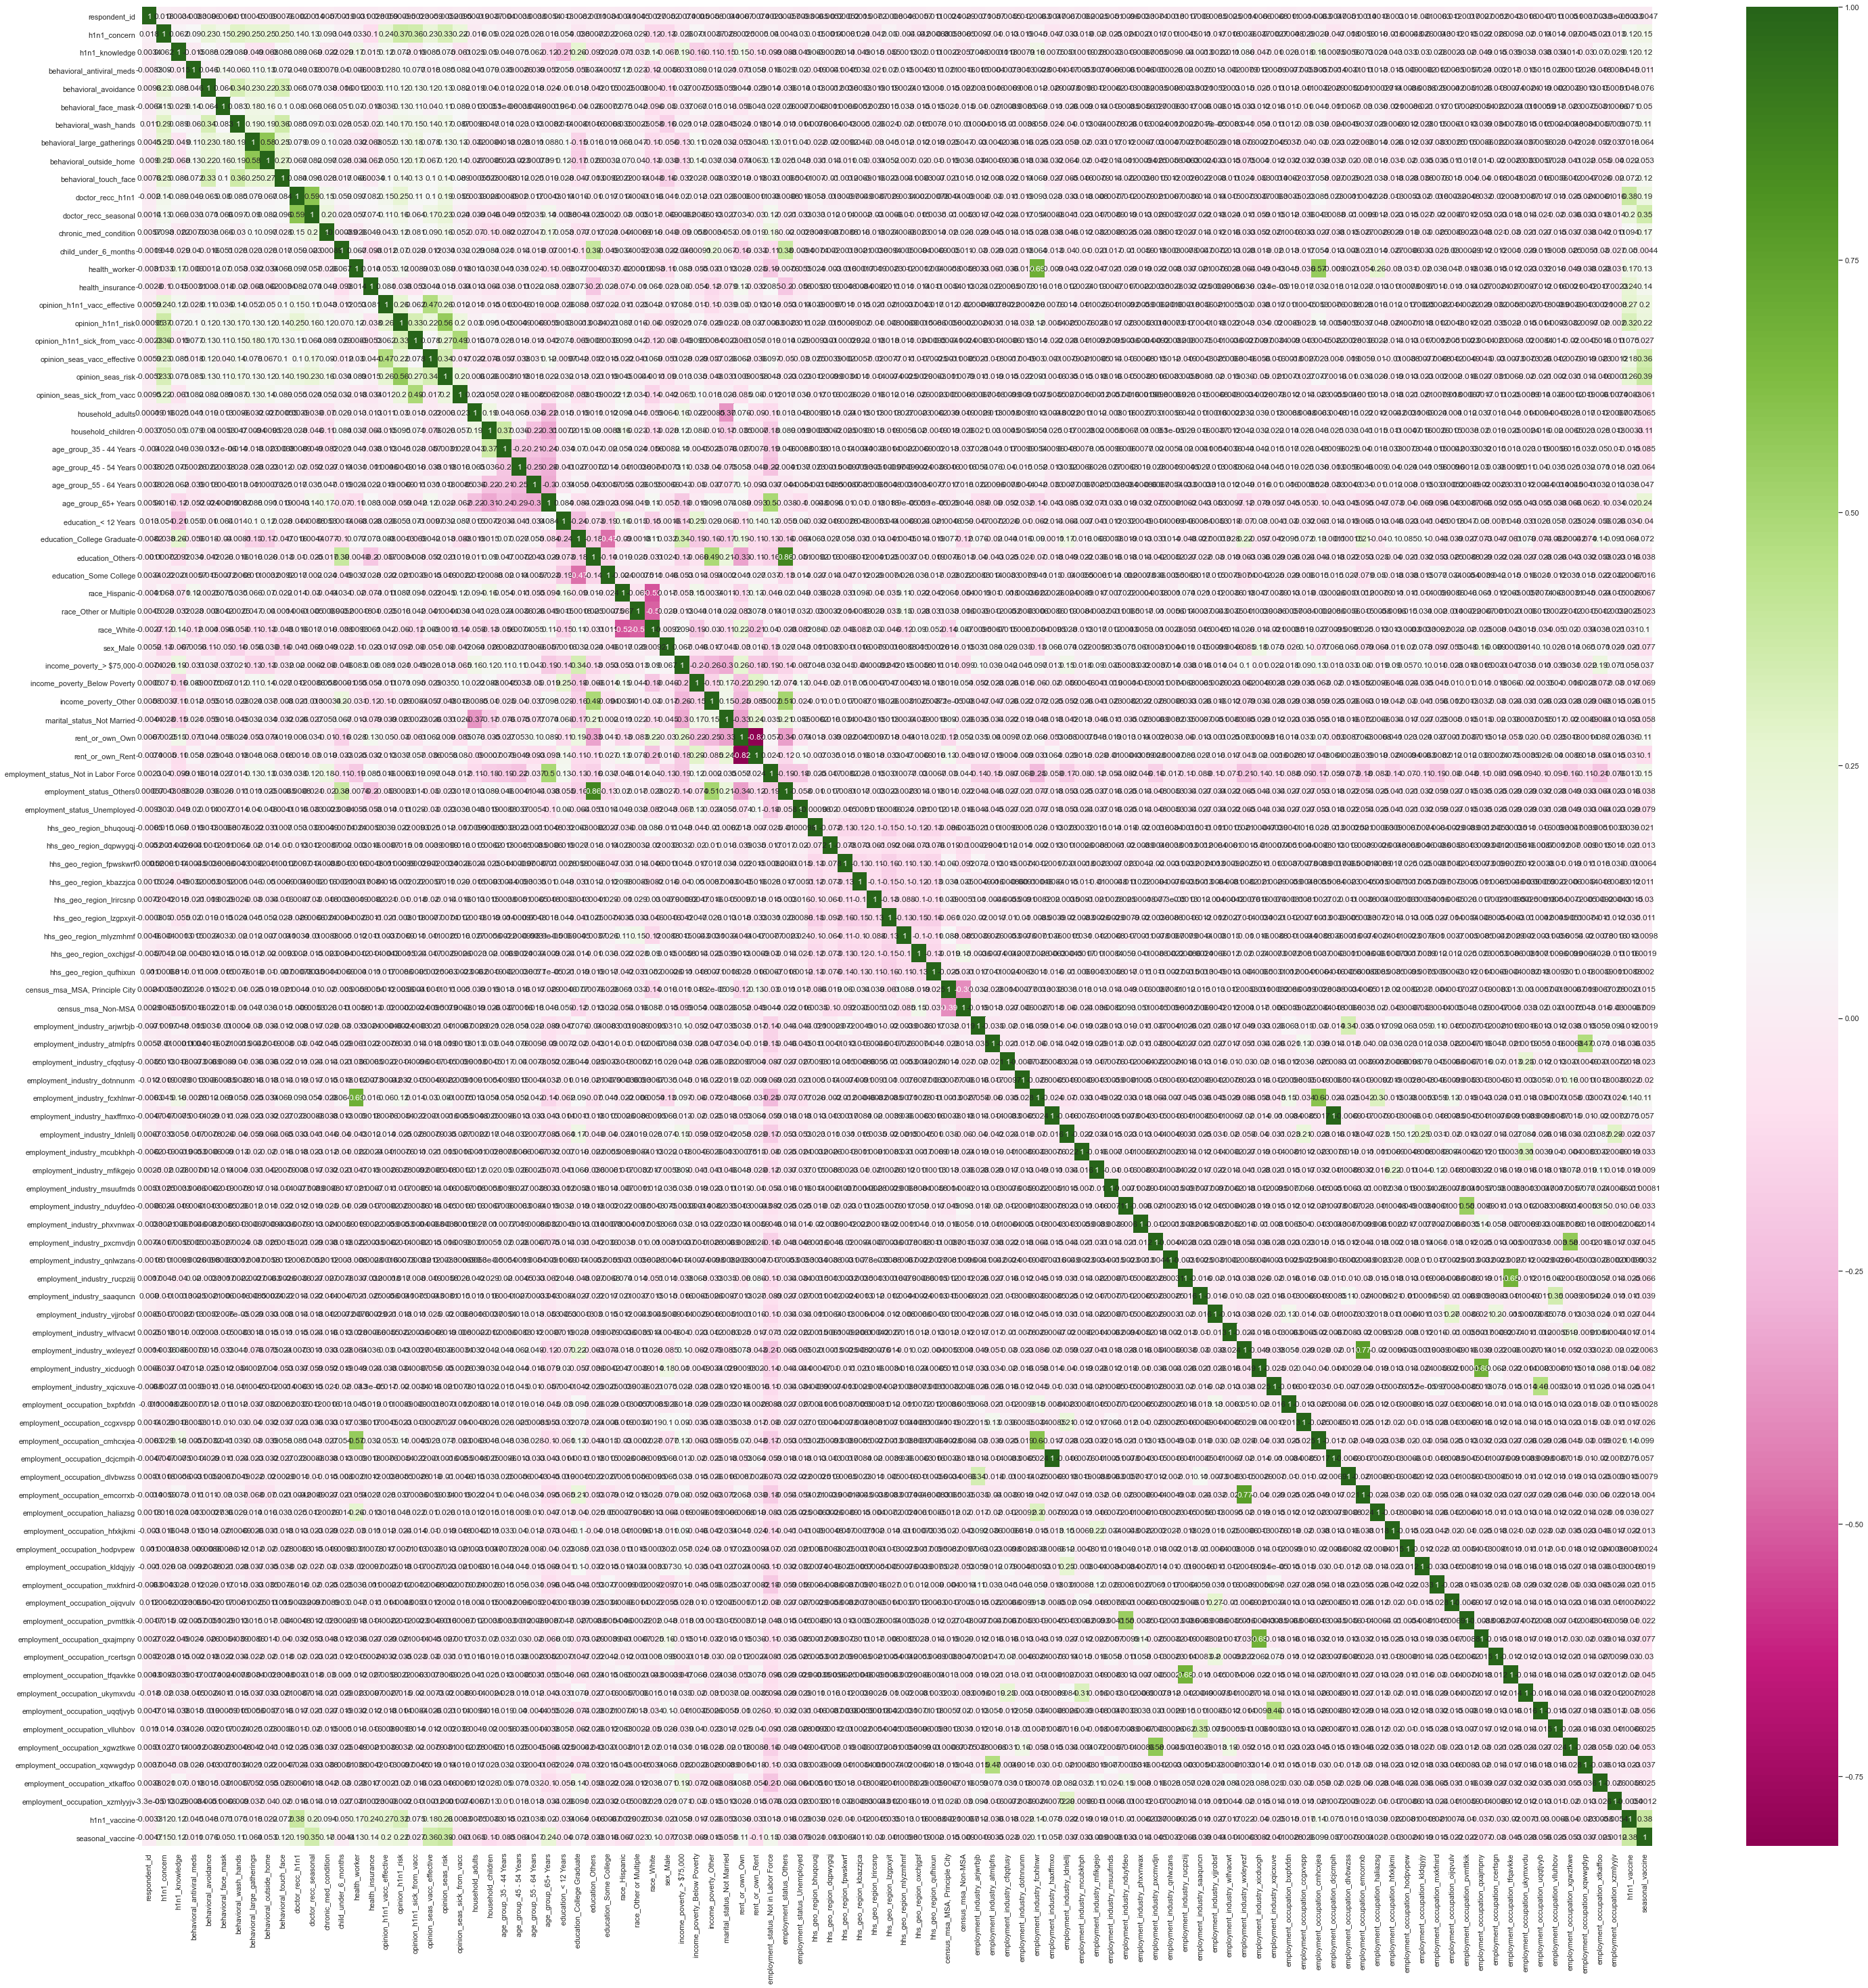

In [93]:
#pearson correlation
corr = new_data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(50,50))
#plot heat map
g=sb.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="PiYG")

##### 1.2. Feature importance : 

In [94]:
X = new_data.iloc[:,:-2]  #independent columns
y_h1n1 = new_data["h1n1_vaccine"]    #target column 
y_seasonal = new_data["seasonal_vaccine"]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

[0.02726936 0.02214968 0.01945601 0.00650416 0.01287281 0.00768274
 0.00888632 0.01394217 0.01368471 0.01292934 0.0978448  0.02441108
 0.01421793 0.00847189 0.01549361 0.05687733 0.0438817  0.05935434
 0.02249862 0.02427401 0.03766706 0.02035305 0.01756153 0.0149324
 0.00861791 0.00967245 0.01151333 0.01083608 0.00646042 0.01177022
 0.00247221 0.01135067 0.00516401 0.00528731 0.01052111 0.01527039
 0.01114923 0.00669856 0.00889091 0.01278704 0.00974025 0.00908686
 0.01032142 0.00251349 0.00447036 0.00976901 0.00468946 0.00956784
 0.00888939 0.00752336 0.01101929 0.00800398 0.00902965 0.00965364
 0.01418779 0.01387517 0.00397844 0.00271985 0.00149674 0.00080181
 0.0086217  0.00348674 0.00369486 0.00123879 0.00263532 0.00075972
 0.00134986 0.00063991 0.00313492 0.00011832 0.00174254 0.00168407
 0.00183559 0.0012628  0.00501931 0.00244372 0.00187061 0.00191579
 0.00160521 0.00756053 0.00298501 0.00183825 0.00385028 0.00164492
 0.00272308 0.00150383 0.00236169 0.00455879 0.00167903 0.00040

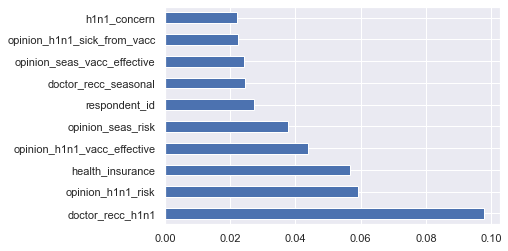

In [95]:
# for h1n1_vaccine
model.fit(X,y_h1n1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.02657725 0.02234755 0.01964143 0.00539286 0.01278179 0.00657422
 0.00997028 0.01370357 0.01370272 0.01362948 0.02186285 0.07456473
 0.01745248 0.00762052 0.01093732 0.01802008 0.02600114 0.02878759
 0.02063464 0.06840779 0.07735252 0.02321874 0.01811509 0.01577313
 0.00811362 0.00924175 0.01163868 0.03617805 0.00693951 0.01245091
 0.0024762  0.01163949 0.00522108 0.0051242  0.0112129  0.01465724
 0.01111025 0.00767144 0.00900062 0.01333492 0.00921742 0.00874038
 0.01381761 0.00244362 0.00498109 0.00933851 0.00488951 0.00990697
 0.0090287  0.00754715 0.01078852 0.00727728 0.00900799 0.0094804
 0.0140252  0.01361855 0.00399845 0.00335332 0.00178738 0.00125311
 0.00778469 0.00252403 0.00385261 0.00123649 0.00326516 0.00103197
 0.00130008 0.00060288 0.00341597 0.00012026 0.00213375 0.00167343
 0.00248492 0.00128879 0.00477505 0.00279581 0.00256503 0.00184975
 0.00178089 0.00435303 0.00277431 0.00136865 0.00384717 0.0013283
 0.00328337 0.00132143 0.00225216 0.00506651 0.00154517 0.000575

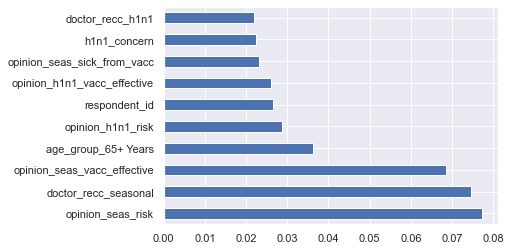

In [96]:
# seasonal_vaccine
model.fit(X,y_seasonal)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- After Visualize Above Plots, These Features Are Highly Correlated With Target Features

##### Remove less correlated features

In [97]:
# remove less correlated features
new_data.drop(['race_Hispanic','race_Other or Multiple', 'race_White',
               'child_under_6_months','household_adults','behavioral_antiviral_meds',
               'behavioral_large_gatherings','behavioral_outside_home', 'marital_status_Not Married',
               'behavioral_avoidance','behavioral_face_mask','income_poverty_> $75,000', 
               'income_poverty_Below Poverty','income_poverty_Other','employment_status_Not in Labor Force',
               'employment_status_Others', 'employment_status_Unemployed','rent_or_own_Own',
               'rent_or_own_Rent','education_< 12 Years', 'education_College Graduate','education_Others', 
               'education_Some College','census_msa_MSA, Principle City','census_msa_Non-MSA'],
          axis=1,inplace = True)

In [98]:
# remove less correlated features
new_data.drop(['employment_industry_arjwrbjb',
       'employment_industry_atmlpfrs', 'employment_industry_cfqqtusy',
       'employment_industry_dotnnunm', 'employment_industry_fcxhlnwr',
       'employment_industry_haxffmxo', 'employment_industry_ldnlellj',
       'employment_industry_mcubkhph', 'employment_industry_mfikgejo',
       'employment_industry_msuufmds', 'employment_industry_nduyfdeo',
       'employment_industry_phxvnwax', 'employment_industry_pxcmvdjn',
       'employment_industry_qnlwzans', 'employment_industry_rucpziij',
       'employment_industry_saaquncn', 'employment_industry_vjjrobsf',
       'employment_industry_wlfvacwt', 'employment_industry_wxleyezf',
       'employment_industry_xicduogh', 'employment_industry_xqicxuve',
       'employment_occupation_bxpfxfdn', 'employment_occupation_ccgxvspp',
       'employment_occupation_cmhcxjea', 'employment_occupation_dcjcmpih',
       'employment_occupation_dlvbwzss', 'employment_occupation_emcorrxb',
       'employment_occupation_haliazsg', 'employment_occupation_hfxkjkmi',
       'employment_occupation_hodpvpew', 'employment_occupation_kldqjyjy',
       'employment_occupation_mxkfnird', 'employment_occupation_oijqvulv',
       'employment_occupation_pvmttkik', 'employment_occupation_qxajmpny',
       'employment_occupation_rcertsgn', 'employment_occupation_tfqavkke',
       'employment_occupation_ukymxvdu', 'employment_occupation_uqqtjvyb',
       'employment_occupation_vlluhbov', 'employment_occupation_xgwztkwe',
       'employment_occupation_xqwwgdyp', 'employment_occupation_xtkaffoo',
       'employment_occupation_xzmlyyjv'],
          axis=1,inplace = True)



In [99]:
# remove less correlated features
new_data.drop(['household_children','behavioral_touch_face','respondent_id','behavioral_wash_hands',
               'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun'],
          axis=1,inplace = True)

In [100]:
# remove less correlated features
new_data.drop(['h1n1_knowledge','chronic_med_condition','health_worker','health_insurance','age_group_35 - 44 Years', 
               'age_group_45 - 54 Years','age_group_55 - 64 Years', 'age_group_65+ Years','sex_Male'],
              axis = 1, inplace= True) 

In [101]:
# Now clean data
clean_data=new_data
clean_data

h1n1_concern  doctor_recc_h1n1  doctor_recc_seasonal  \
0               1.0          0.000000              0.000000   
1               3.0          0.000000              0.000000   
2               1.0          0.220312              0.329735   
3               1.0          0.000000              1.000000   
4               2.0          0.000000              0.000000   
...             ...               ...                   ...   
26702           2.0          0.000000              0.000000   
26703           1.0          1.000000              1.000000   
26704           2.0          0.000000              0.000000   
26705           1.0          0.000000              0.000000   
26706           0.0          0.000000              0.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              3.0                1.0   
1                              5.0                4.0   
2                              3.0                1.0   
3                              3.0                3.0   
4                              3.0                3.0   
...                            ...                ...   
26702                          3.0                1.0   
26703                          4.0                2.0   
26704                          4.0                4.0   
26705                          3.0                1.0   
26706                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                              2.0                          2.0   
1                              4.0                          4.0   
2                              1.0                          4.0   
3                              5.0                          5.0   
4                              2.0                          3.0   
...                            ...                          ...   
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                          2.0                          2.0   
26706                          1.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc  h1n1_vaccine  \
0                    1.0                          2.0             0   
1                    2.0                          4.0             0   
2                    1.0                          2.0             0   
3                    4.0                          1.0             0   
4                    1.0                          4.0             0   
...                  ...                          ...           ...   
26702                2.0                          2.0             0   
26703                1.0                          1.0             0   
26704                4.0                          2.0             0   
26705                1.0                          2.0             0   
26706                1.0                          1.0             0   

       seasonal_vaccine  
0                     0  
1                     1  
2                     0  
3                     1  
4                     0  
...                 ...  
26702                 0  
26703                 0  
26704                 1  
26705                 0  
26706                 0  

[26707 rows x 11 columns]

##### 2. Feature Scaling

##### Check Distribution

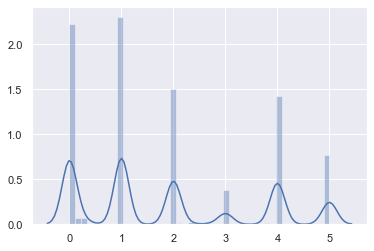

In [102]:
# seaborn plot for clean data
sb.distplot(clean_data)

In [103]:
#skewness for clean data
skewness = stats.skew(clean_data)
skewness

array([-0.16018044,  1.40778893,  0.75555054, -0.90933529,  0.6778602 ,
        0.65611349, -1.326626  ,  0.25335839,  0.92892096,  1.40594284,
        0.13789352])

In [104]:
# kurtosis for clean data
kurtosis = stats.kurtosis(clean_data)
kurtosis

array([-0.76206272,  0.06986414, -1.34114893,  0.5674936 , -0.81495011,
       -0.98750368,  1.16903139, -1.35854364, -0.55180431, -0.02332474,
       -1.98098538])

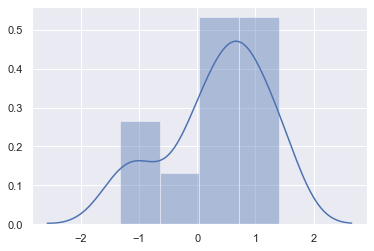

In [105]:
# seaborn plot for skewness for clean data 
sb.distplot(skewness)

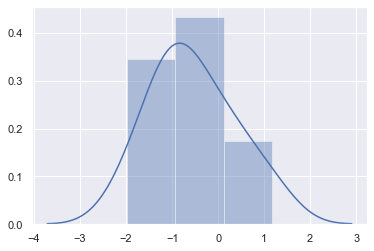

In [106]:
# seaborn plot for kurtosis for clean data
sb.distplot(kurtosis)

Data is Normalized

### Model Selection and Building

##### Defining X and Y

In [107]:
# X for modeling
X = clean_data.iloc[:,:-2]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   doctor_recc_h1n1             26707 non-null  float64
 2   doctor_recc_seasonal         26707 non-null  float64
 3   opinion_h1n1_vacc_effective  26707 non-null  float64
 4   opinion_h1n1_risk            26707 non-null  float64
 5   opinion_h1n1_sick_from_vacc  26707 non-null  float64
 6   opinion_seas_vacc_effective  26707 non-null  float64
 7   opinion_seas_risk            26707 non-null  float64
 8   opinion_seas_sick_from_vacc  26707 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [108]:
X

h1n1_concern  doctor_recc_h1n1  doctor_recc_seasonal  \
0               1.0          0.000000              0.000000   
1               3.0          0.000000              0.000000   
2               1.0          0.220312              0.329735   
3               1.0          0.000000              1.000000   
4               2.0          0.000000              0.000000   
...             ...               ...                   ...   
26702           2.0          0.000000              0.000000   
26703           1.0          1.000000              1.000000   
26704           2.0          0.000000              0.000000   
26705           1.0          0.000000              0.000000   
26706           0.0          0.000000              0.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              3.0                1.0   
1                              5.0                4.0   
2                              3.0                1.0   
3                              3.0                3.0   
4                              3.0                3.0   
...                            ...                ...   
26702                          3.0                1.0   
26703                          4.0                2.0   
26704                          4.0                4.0   
26705                          3.0                1.0   
26706                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                              2.0                          2.0   
1                              4.0                          4.0   
2                              1.0                          4.0   
3                              5.0                          5.0   
4                              2.0                          3.0   
...                            ...                          ...   
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                          2.0                          2.0   
26706                          1.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc  
0                    1.0                          2.0  
1                    2.0                          4.0  
2                    1.0                          2.0  
3                    4.0                          1.0  
4                    1.0                          4.0  
...                  ...                          ...  
26702                2.0                          2.0  
26703                1.0                          1.0  
26704                4.0                          2.0  
26705                1.0                          2.0  
26706                1.0                          1.0  

[26707 rows x 9 columns]

In [109]:
# y for h1n1_vaccine
y_h1n1 = clean_data['h1n1_vaccine']
y_h1n1

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

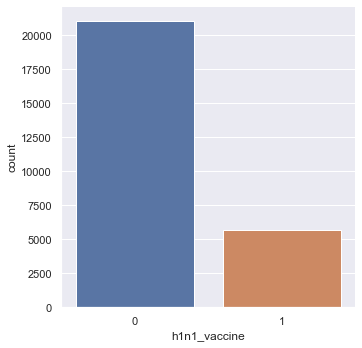

In [110]:
sb.catplot('h1n1_vaccine', data = clean_data, kind = 'count')

In [111]:
# y for seasonal_vaccine
y_seasonal = clean_data['seasonal_vaccine']
y_seasonal

0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

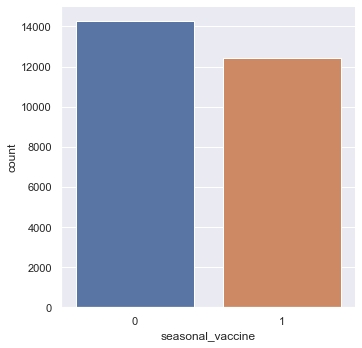

In [112]:
sb.catplot('seasonal_vaccine', data = clean_data, kind = 'count')

##### splitting the data

In [113]:
# for h1n1_vaccine
X_train, X_test, y_train_h1n1, y_test_h1n1=train_test_split(X,y_h1n1,test_size=0.3,random_state=10)

In [114]:
# for seasonal_vaccine
X_train, X_test, y_train_seasonal, y_test_seasonal=train_test_split(X,y_seasonal,test_size=0.3,random_state=10)

In [115]:
X_train

h1n1_concern  doctor_recc_h1n1  doctor_recc_seasonal  \
11925           1.0          0.220312              0.329735   
21713           2.0          0.000000              0.000000   
19533           2.0          1.000000              1.000000   
9356            2.0          1.000000              1.000000   
1018            1.0          0.000000              0.000000   
...             ...               ...                   ...   
9372            2.0          0.000000              1.000000   
7291            3.0          0.000000              0.000000   
17728           1.0          0.000000              0.000000   
7293            2.0          0.000000              0.000000   
17673           2.0          0.000000              0.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
11925                          2.0                2.0   
21713                          4.0                2.0   
19533                          4.0                4.0   
9356                           3.0                5.0   
1018                           4.0                4.0   
...                            ...                ...   
9372                           5.0                4.0   
7291                           5.0                1.0   
17728                          4.0                2.0   
7293                           4.0                2.0   
17673                          3.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
11925                          1.0                          2.0   
21713                          4.0                          2.0   
19533                          2.0                          4.0   
9356                           4.0                          4.0   
1018                           2.0                          4.0   
...                            ...                          ...   
9372                           4.0                          5.0   
7291                           2.0                          1.0   
17728                          2.0                          4.0   
7293                           1.0                          1.0   
17673                          1.0                          3.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc  
11925                2.0                          1.0  
21713                1.0                          1.0  
19533                2.0                          2.0  
9356                 4.0                          1.0  
1018                 4.0                          4.0  
...                  ...                          ...  
9372                 4.0                          5.0  
7291                 2.0                          1.0  
17728                2.0                          2.0  
7293                 2.0                          1.0  
17673                1.0                          1.0  

[18694 rows x 9 columns]

In [116]:
X_test

h1n1_concern  doctor_recc_h1n1  doctor_recc_seasonal  \
2653            3.0          0.000000              1.000000   
9506            2.0          0.220312              0.329735   
23107           2.0          0.000000              1.000000   
22648           2.0          0.000000              1.000000   
25589           3.0          0.000000              0.000000   
...             ...               ...                   ...   
6273            2.0          0.220312              0.329735   
9671            0.0          0.000000              1.000000   
1301            1.0          0.220312              0.329735   
21048           1.0          0.000000              0.000000   
17388           3.0          1.000000              1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
2653                           5.0                2.0   
9506                           4.0                4.0   
23107                          4.0                3.0   
22648                          4.0                2.0   
25589                          5.0                2.0   
...                            ...                ...   
6273                           5.0                4.0   
9671                           4.0                1.0   
1301                           4.0                2.0   
21048                          5.0                4.0   
17388                          5.0                4.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
2653                           2.0                          5.0   
9506                           2.0                          4.0   
23107                          1.0                          5.0   
22648                          4.0                          5.0   
25589                          1.0                          5.0   
...                            ...                          ...   
6273                           1.0                          5.0   
9671                           1.0                          5.0   
1301                           1.0                          4.0   
21048                          1.0                          5.0   
17388                          5.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc  
2653                 5.0                          4.0  
9506                 4.0                          1.0  
23107                2.0                          2.0  
22648                2.0                          2.0  
25589                4.0                          1.0  
...                  ...                          ...  
6273                 1.0                          1.0  
9671                 1.0                          1.0  
1301                 2.0                          1.0  
21048                4.0                          1.0  
17388                4.0                          4.0  

[8013 rows x 9 columns]

In [117]:
y_train_h1n1

11925    0
21713    0
19533    1
9356     0
1018     1
        ..
9372     1
7291     0
17728    0
7293     0
17673    0
Name: h1n1_vaccine, Length: 18694, dtype: int64

In [118]:
y_test_h1n1

2653     0
9506     0
23107    0
22648    0
25589    1
        ..
6273     0
9671     0
1301     0
21048    1
17388    0
Name: h1n1_vaccine, Length: 8013, dtype: int64

In [119]:
y_train_seasonal

11925    0
21713    0
19533    1
9356     1
1018     1
        ..
9372     1
7291     0
17728    0
7293     0
17673    0
Name: seasonal_vaccine, Length: 18694, dtype: int64

In [120]:
y_test_seasonal

2653     1
9506     1
23107    0
22648    1
25589    1
        ..
6273     1
9671     1
1301     1
21048    1
17388    0
Name: seasonal_vaccine, Length: 8013, dtype: int64

In [121]:
# shape of train test data
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train_h1n1 shape", y_train_h1n1.shape)
print("y_test_h1n1 shape", y_test_h1n1.shape)
print("y_train_seasonal shape", y_train_seasonal.shape)
print("y_test_seasonal shape", y_test_seasonal.shape)

X_train shape (18694, 9)
X_test shape (8013, 9)
y_train_h1n1 shape (18694,)
y_test_h1n1 shape (8013,)
y_train_seasonal shape (18694,)
y_test_seasonal shape (8013,)


### Creating and Training, Model

##### Hyporthesis Data Tuning Using GridSeachCV

In [122]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [123]:
# creating model for target 
model = XGBClassifier()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [0],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
grid_search_cv = GridSearchCV(model, parameters,n_jobs = 5, verbose=1, cv=3)

##### fitting model for h1n1

In [124]:
grid_search_cv.fit(X_train,y_train_h1n1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed:  2.9min finished


[16:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [125]:
grid_search_cv.best_score_

0.8303731061725892

In [126]:
grid_search_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 0,
 'subsample': 0.7}

In [127]:
model_h1n1 = XGBClassifier(colsample_bytree = 0.7,
                             learning_rate = 0.03,
                             max_depth = 6,
                             min_child_weight = 4,
                             n_estimators = 500,
                             nthread = 4,
                             objective = 'reg:linear',
                             silent = 0,
                             subsample = 0.7)

In [128]:
model_h1n1.fit(X_train,y_train_h1n1)
model_h1n1.score(X_train,y_train_h1n1)

[16:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.8549267144538355

In [129]:
y_predict_h1n1 = model_h1n1.predict(X_test)
accuracy_score(y_test_h1n1,y_predict_h1n1)

0.830650193435667

In [130]:
print(Counter(y_test_h1n1))
pd.crosstab(y_test_h1n1,y_predict_h1n1)

Counter({0: 6319, 1: 1694})


col_0            0    1
h1n1_vaccine           
0             5932  387
1              970  724

#####  fitting model for seasonal

In [131]:
grid_search_cv.fit(X_train,y_train_seasonal)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed:  2.0min finished


[16:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [132]:
grid_search_cv.best_score_

0.753717720355117

In [133]:
grid_search_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 0,
 'subsample': 0.7}

In [134]:
model_seasonal = XGBClassifier(colsample_bytree = 0.7,
                             learning_rate = 0.03,
                             max_depth = 5,
                             min_child_weight = 4,
                             n_estimators = 500,
                             nthread = 4,
                             objective = 'reg:linear',
                             silent = 0,
                             subsample = 0.7)

In [135]:
model_seasonal.fit(X_train,y_train_seasonal)
model_seasonal.score(X_train,y_train_seasonal)

[16:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.7745265860703969

In [136]:
y_predict_seasonal = model_seasonal.predict(X_test)
accuracy_score(y_test_seasonal,y_predict_seasonal)

0.7487832272557094

### Handle Imbalanced h1n1_vaccine Dataset with the help of SMOTE

In [137]:
# accuracy score before handling imbalance data 
print(accuracy_score(y_test_h1n1, y_predict_h1n1))
print(Counter(y_test_h1n1))
pd.crosstab(y_test_h1n1,y_predict_h1n1)

0.830650193435667
Counter({0: 6319, 1: 1694})


col_0            0    1
h1n1_vaccine           
0             5932  387
1              970  724

In [138]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_h1n1,y_predict_h1n1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6319
           1       0.65      0.43      0.52      1694

    accuracy                           0.83      8013
   macro avg       0.76      0.68      0.71      8013
weighted avg       0.82      0.83      0.82      8013



In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train_h1n1)

In [140]:
print(Counter(y_train_h1n1))
print(Counter(y_train_smote))

Counter({0: 14714, 1: 3980})
Counter({0: 14714, 1: 14714})


In [141]:
X_train_smote

h1n1_concern  doctor_recc_h1n1  doctor_recc_seasonal  \
0               1.0          0.220312              0.329735   
1               2.0          0.000000              0.000000   
2               2.0          1.000000              1.000000   
3               2.0          1.000000              1.000000   
4               1.0          0.000000              0.000000   
...             ...               ...                   ...   
29423           1.0          0.000000              0.000000   
29424           1.0          0.000000              0.000000   
29425           1.0          0.000000              0.000000   
29426           3.0          1.000000              1.000000   
29427           2.0          0.000000              0.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              2.0           2.000000   
1                              4.0           2.000000   
2                              4.0           4.000000   
3                              3.0           5.000000   
4                              4.0           4.000000   
...                            ...                ...   
29423                          5.0           2.000000   
29424                          3.0           4.642227   
29425                          4.0           1.000000   
29426                          5.0           5.000000   
29427                          4.0           2.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                              1.0                     2.000000   
1                              4.0                     2.000000   
2                              2.0                     4.000000   
3                              4.0                     4.000000   
4                              2.0                     4.000000   
...                            ...                          ...   
29423                          2.0                     4.000000   
29424                          4.0                     5.000000   
29425                          2.0                     4.441177   
29426                          1.0                     5.000000   
29427                          2.0                     4.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  
0               2.000000                          1.0  
1               1.000000                          1.0  
2               2.000000                          2.0  
3               4.000000                          1.0  
4               4.000000                          4.0  
...                  ...                          ...  
29423           2.000000                          4.0  
29424           4.642227                          4.0  
29425           2.000000                          1.0  
29426           5.000000                          1.0  
29427           2.000000                          2.0  

[29428 rows x 9 columns]

In [142]:
model_h1n1_smote = XGBClassifier(colsample_bytree = 0.7,
                             learning_rate = 0.03,
                             max_depth = 6,
                             min_child_weight = 4,
                             n_estimators = 500,
                             nthread = 4,
                             objective = 'reg:linear',
                             silent = 0,
                             subsample = 0.7)
model_h1n1_smote.fit(X_train_smote,y_train_smote)
model_h1n1_smote.score(X_train_smote,y_train_smote)

[16:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.8676770422726655

In [143]:
y_predict_h1n1_smote = model_h1n1_smote.predict(X_test)

In [144]:
# accuracy score after handling imbalance data 
print(accuracy_score(y_test_h1n1, y_predict_h1n1_smote))
print(Counter(y_test_h1n1))
pd.crosstab(y_test_h1n1,y_predict_h1n1_smote)

0.8199176338450018
Counter({0: 6319, 1: 1694})


col_0            0     1
h1n1_vaccine            
0             5565   754
1              689  1005

In [145]:
print(classification_report(y_test_h1n1,y_predict_h1n1_smote))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6319
           1       0.57      0.59      0.58      1694

    accuracy                           0.82      8013
   macro avg       0.73      0.74      0.73      8013
weighted avg       0.82      0.82      0.82      8013



### PCA

In [146]:
# import pca package anf transform feature
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
data1 = pd.DataFrame(pca.fit_transform(X))
data1.head()

0         1         2         3         4         5         6  \
0 -2.535162  1.724912  0.618947  0.188081  0.216650 -0.124243  0.607505   
1  2.386576  1.449850 -0.903855  0.687785  1.851528 -0.356850  0.089766   
2 -2.537662  0.446865 -0.399534 -0.543132  0.165179 -0.030998 -0.746143   
3  1.720061 -0.096857  0.395412  1.762515 -2.085444  1.260179 -0.554457   
4 -0.381245  2.072481  0.414477 -0.480473  1.847508 -0.401467 -0.803719   

          7  
0 -0.124257  
1 -0.481273  
2  0.203398  
3  0.276334  
4 -0.266199

In [147]:
# shape of data1
data1.shape

(26707, 8)

In [148]:
# shape of clean_data
clean_data.shape

(26707, 11)

In [149]:
data1

0         1         2         3         4         5         6  \
0     -2.535162  1.724912  0.618947  0.188081  0.216650 -0.124243  0.607505   
1      2.386576  1.449850 -0.903855  0.687785  1.851528 -0.356850  0.089766   
2     -2.537662  0.446865 -0.399534 -0.543132  0.165179 -0.030998 -0.746143   
3      1.720061 -0.096857  0.395412  1.762515 -2.085444  1.260179 -0.554457   
4     -0.381245  2.072481  0.414477 -0.480473  1.847508 -0.401467 -0.803719   
...         ...       ...       ...       ...       ...       ...       ...   
26702 -1.569326 -0.283195 -0.749935 -0.773643 -0.435957 -0.852129 -1.189595   
26703 -1.483651 -0.629903 -1.101590  0.859076  0.318931  0.663069 -0.728047   
26704  1.570918 -1.451450  0.527109 -0.182944  0.326356  0.071182 -0.669183   
26705 -2.535162  1.724912  0.618947  0.188081  0.216650 -0.124243  0.607505   
26706 -2.595183 -1.109233 -1.766431 -0.192344  0.300019  1.262360  0.177764   

              7  
0     -0.124257  
1     -0.481273  
2      0.203398  
3      0.276334  
4     -0.266199  
...         ...  
26702 -0.316896  
26703  1.097441  
26704 -0.597991  
26705 -0.124257  
26706 -0.239713  

[26707 rows x 8 columns]

In [150]:
# calculate variance
var=pca.explained_variance_ratio_
var

array([0.3856142 , 0.20308263, 0.11006983, 0.08999058, 0.07309035,
       0.05528955, 0.05086858, 0.02534313])

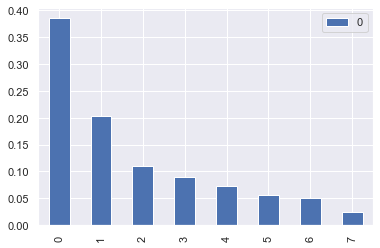

In [151]:
# plotting bar graph
var1 = pd.DataFrame(var)
var1.plot(kind='bar')

In [152]:
dfX = data1.iloc[:,:]
dfX.head(2)

0         1         2         3         4         5         6  \
0 -2.535162  1.724912  0.618947  0.188081  0.216650 -0.124243  0.607505   
1  2.386576  1.449850 -0.903855  0.687785  1.851528 -0.356850  0.089766   

          7  
0 -0.124257  
1 -0.481273

In [153]:
#for h1n1_vaccine
dfX_train, dfX_test, y_train_h1n1, y_test_h1n1=train_test_split(X,y_h1n1,test_size=0.3,random_state=10)

In [154]:
model_h1n1_pca = XGBClassifier(colsample_bytree = 0.7,
                             learning_rate = 0.03,
                             max_depth = 6,
                             min_child_weight = 4,
                             n_estimators = 500,
                             nthread = 4,
                             objective = 'reg:linear',
                             silent = 0,
                             subsample = 0.7)
model_h1n1_pca.fit(dfX_train,y_train_h1n1)
model_h1n1_pca.score(dfX_train,y_train_h1n1)

[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.8549267144538355

In [155]:
y_predict_h1n1_pca = model_h1n1_pca.predict(dfX_test)
print(accuracy_score(y_test_h1n1, y_predict_h1n1_pca))

0.830650193435667


In [156]:
# for seasonal_vaccine
dfX_train,dfX_test,y_train_seasonal,y_test_seasonal=train_test_split(X,y_seasonal,random_state=10,test_size=0.3)

In [157]:
model_seasonal_pca = XGBClassifier(colsample_bytree = 0.7,
                             learning_rate = 0.03,
                             max_depth = 5,
                             min_child_weight = 4,
                             n_estimators = 500,
                             nthread = 4,
                             objective = 'reg:linear',
                             silent = 0,
                             subsample = 0.7)

model_seasonal_pca.fit(dfX_train,y_train_seasonal)
model_seasonal_pca.score(dfX_train,y_train_seasonal)

[16:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.7745265860703969

In [158]:
y_predict_seasonal_pca = model_seasonal_pca.predict(dfX_test)
print(accuracy_score(y_test_seasonal,y_predict_seasonal_pca))

0.7487832272557094


Text(0, 0.5, 'Second Principal comaponent')

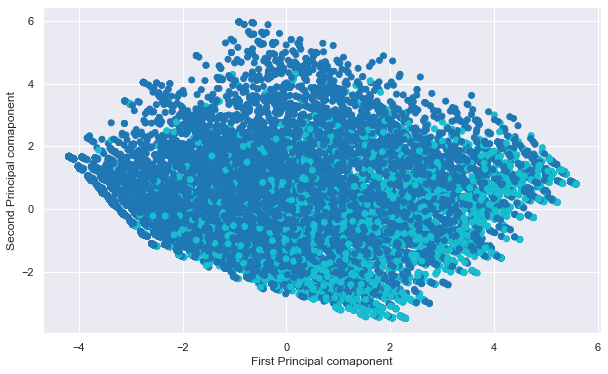

In [159]:
# graph for h1n1
#scatter() : 1. shows the data as a collection of points. 
#            2. plot graph based on target variable
plt.figure(figsize=(10,6))
plt.scatter(x=dfX.iloc[:,0],
            y=dfX.iloc[:,1],
            c=data['h1n1_vaccine'],
            cmap='tab10'
           )
plt.xlabel("First Principal comaponent")
plt.ylabel("Second Principal comaponent")

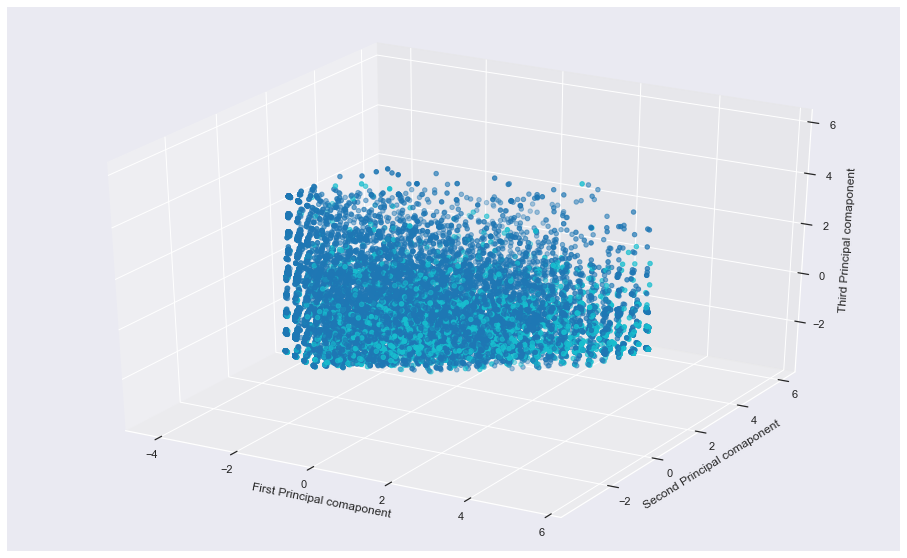

In [160]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfX.iloc[:,0], 
    ys=dfX.iloc[:,1], 
    zs=dfX.iloc[:,2], 
    c=data['h1n1_vaccine'],
    cmap='tab10'
)
ax.set_xlabel('First Principal comaponent')
ax.set_ylabel('Second Principal comaponent')
ax.set_zlabel('Third Principal comaponent')
plt.show()

Text(0, 0.5, 'Second Principal comaponent')

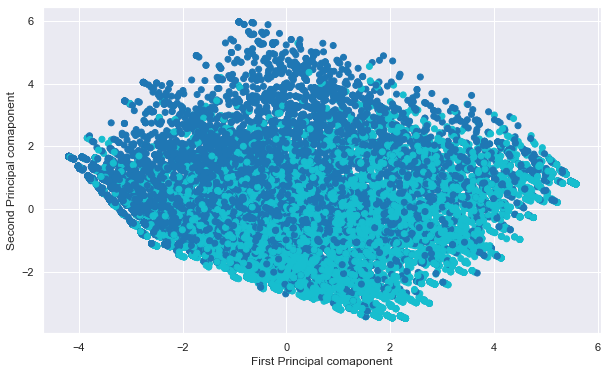

In [161]:
# graph for seasonal
#scatter() : 1. shows the data as a collection of points. 
#            2. plot graph based on target variable
plt.figure(figsize=(10,6))
plt.scatter(x=dfX.iloc[:,0],
            y=dfX.iloc[:,1],
            c=data['seasonal_vaccine'],
            cmap='tab10'
           )
plt.xlabel("First Principal comaponent")
plt.ylabel("Second Principal comaponent")

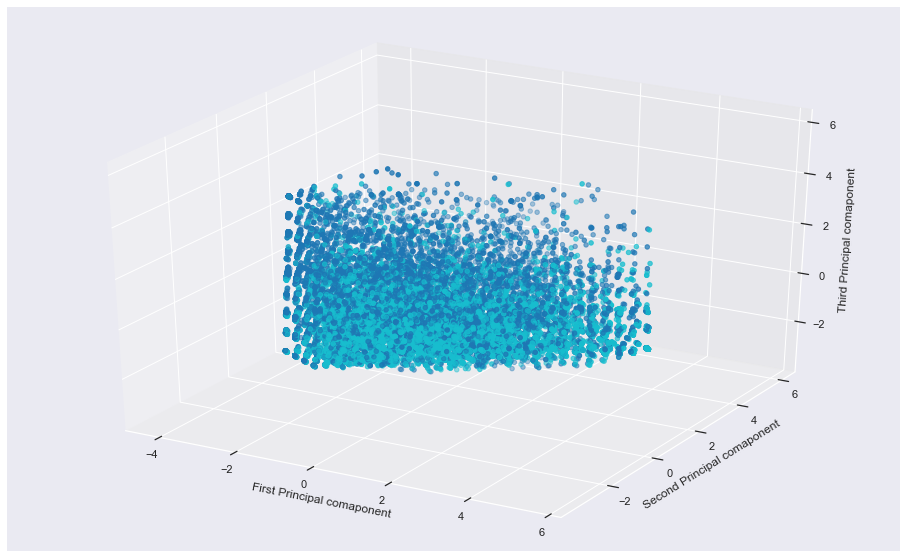

In [162]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfX.iloc[:,0], 
    ys=dfX.iloc[:,1], 
    zs=dfX.iloc[:,2], 
    c=data['seasonal_vaccine'],
    cmap='tab10'
)
ax.set_xlabel('First Principal comaponent')
ax.set_ylabel('Second Principal comaponent')
ax.set_zlabel('Third Principal comaponent')
plt.show()

### RESULTS
    1. Accuracy Score
    2. Confusion Matrix
    3. Error
    4. Precision
    5. Recall
    6. F1 Score
    7. Evaluating Precision, recall,F1 score matrix
    8. Roc Auc Score & Curve

##### For h1n1_vaccine

##### 1. Accuracy Score

In [163]:
print(accuracy_score(y_test_h1n1, y_predict_h1n1_smote))#balanced h1n1_vaccine data

0.8199176338450018


##### 2. Confusion Matrix

In [164]:
print(pd.crosstab(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data

col_0            0     1
h1n1_vaccine            
0             5565   754
1              689  1005


In [165]:
print(confusion_matrix(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data

[[5565  754]
 [ 689 1005]]


##### 3. Error

In [166]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data
print(math.sqrt(mean_squared_error(y_test_h1n1,y_predict_h1n1_smote)))#balanced h1n1_vaccine data

0.18008236615499812
0.42436112705453843


##### 4. Precision

In [167]:
# Precision for h1n1
print('Precision: %.3f' % precision_score(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data

Precision: 0.571


##### 5. Recall

In [168]:
# Recall for h1n1
print('Recall: %.3f' % recall_score(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data


Recall: 0.593


##### 6. F1 Score

In [169]:
# F1 score for h1n1
print('F1 Score: %.3f' % f1_score(y_test_h1n1,y_predict_h1n1_smote))# balanced h1n1_vaccine data

F1 Score: 0.582


##### 7. Evaluating precision, recall, F1 score matrix

In [170]:
# Evaluation:Precision, Recall, and F1 Score for h1n1_vaccine
from sklearn.metrics import classification_report
print(classification_report(y_test_h1n1,y_predict_h1n1_smote))#balanced h1n1_vaccine data

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6319
           1       0.57      0.59      0.58      1694

    accuracy                           0.82      8013
   macro avg       0.73      0.74      0.73      8013
weighted avg       0.82      0.82      0.82      8013



##### 8. Roc Auc Score & Curve

In [171]:
model_h1n1_smote.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [172]:
model_h1n1_smote.predict_proba(X_test)

array([[0.85002947, 0.14997056],
       [0.90935963, 0.09064037],
       [0.94846666, 0.05153331],
       ...,
       [0.83754975, 0.16245025],
       [0.10678017, 0.8932198 ],
       [0.12537122, 0.8746288 ]], dtype=float32)

In [173]:
y_predict_th2 = np.where(model_h1n1_smote.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model_h1n1_smote.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model_h1n1_smote.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [174]:
pd.crosstab(y_test_h1n1,y_predict_th4)

col_0            0     1
h1n1_vaccine            
0             5132  1187
1              514  1180

In [175]:
def predict_threshold (model_h1n1_smote,X_test,thresholds):
    import numpy as np
    return np.where(model_h1n1_smote.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3


In [176]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_h1n1_smote,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test_h1n1,y_predict_h1n1_smote))
probs = model_h1n1_smote.predict_proba(X_test)

Threshold : 0.0
[[5565  754]
 [ 689 1005]]
Threshold : 0.1
[[5565  754]
 [ 689 1005]]
Threshold : 0.2
[[5565  754]
 [ 689 1005]]
Threshold : 0.30000000000000004
[[5565  754]
 [ 689 1005]]
Threshold : 0.4
[[5565  754]
 [ 689 1005]]
Threshold : 0.5
[[5565  754]
 [ 689 1005]]
Threshold : 0.6000000000000001
[[5565  754]
 [ 689 1005]]
Threshold : 0.7000000000000001
[[5565  754]
 [ 689 1005]]
Threshold : 0.8
[[5565  754]
 [ 689 1005]]
Threshold : 0.9
[[5565  754]
 [ 689 1005]]
Threshold : 1.0
[[5565  754]
 [ 689 1005]]


In [177]:
from sklearn.preprocessing import label_binarize
y_score = probs
y=label_binarize(y_h1n1, classes=[0,1])
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [178]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [179]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test_h1n1,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [180]:
print(roc_auc_score)

0.82567458796796


In [181]:
fpr

{0: array([0.        , 0.        , 0.        , ..., 0.98937426, 0.99763872,
        1.        ]),
 1: array([0.00000000e+00, 1.58252888e-04, 3.16505776e-04, ...,
        9.99208736e-01, 9.99208736e-01, 1.00000000e+00])}

In [182]:
tpr

{0: array([0.00000000e+00, 1.58252888e-04, 7.91264441e-04, ...,
        9.99683494e-01, 9.99841747e-01, 1.00000000e+00]),
 1: array([0.        , 0.00236128, 0.01062574, ..., 0.99940968, 1.        ,
        1.        ])}

In [183]:
threshold

{0: array([2.119135  , 1.1191349 , 1.0958275 , ..., 0.01822519, 0.0172143 ,
        0.01283801], dtype=float32),
 1: array([ 1.987162  ,  0.987162  ,  0.9827857 , ..., -0.08524507,
        -0.09407622, -0.11913496], dtype=float32)}

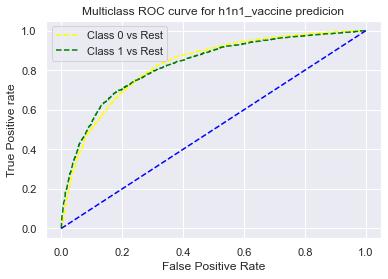

In [184]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for h1n1_vaccine predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);   

##### For seasonal_vaccine

##### 1. Accuracy Score

In [185]:
accuracy_score(y_test_seasonal, y_predict_seasonal_pca)

0.7487832272557094

##### 2. Confusion Matrix

In [186]:
print(Counter(y_test_seasonal))
pd.crosstab(y_test_seasonal,y_predict_seasonal_pca)

Counter({0: 4270, 1: 3743})


col_0                0     1
seasonal_vaccine            
0                 3324   946
1                 1067  2676

In [187]:
confusion_matrix(y_test_seasonal,y_predict_seasonal_pca)

array([[3324,  946],
       [1067, 2676]], dtype=int64)

##### 3. Error

In [188]:
print(mean_squared_error(y_test_seasonal,y_predict_seasonal_pca))
print(math.sqrt(mean_squared_error(y_test_seasonal,y_predict_seasonal_pca)))

0.25121677274429055
0.501215295800408


##### 4. Precision

In [189]:
# Precision for seasonal
print('Precision: %.3f' % precision_score(y_test_seasonal,y_predict_seasonal_pca))

Precision: 0.739


##### 5. Recall

In [190]:
# Recall for h1n1
print('Recall: %.3f' % recall_score(y_test_seasonal,y_predict_seasonal_pca))

Recall: 0.715


##### 6. F1 Score

In [191]:
# F1 score for h1n1
print('F1 Score: %.3f' % f1_score(y_test_seasonal,y_predict_seasonal_pca))

F1 Score: 0.727


##### 7. Evaluating Precision, recall,F1 score matrix

In [192]:
# Evaluation:Precision, Recall, and F1 Score for seasonal_vaccine
print(classification_report(y_test_seasonal,y_predict_seasonal_pca))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4270
           1       0.74      0.71      0.73      3743

    accuracy                           0.75      8013
   macro avg       0.75      0.75      0.75      8013
weighted avg       0.75      0.75      0.75      8013



##### 8. Roc Auc Score & Curve

In [193]:
model_seasonal_pca.predict(dfX_test)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [194]:
model_seasonal_pca.predict_proba(dfX_test)

array([[0.13893819, 0.8610618 ],
       [0.490395  , 0.509605  ],
       [0.10457838, 0.8954216 ],
       ...,
       [0.7720697 , 0.22793028],
       [0.16748464, 0.83251536],
       [0.1547873 , 0.8452127 ]], dtype=float32)

In [195]:
y_predict_th2 = np.where(model_seasonal_pca.predict_proba(dfX_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model_seasonal_pca.predict_proba(dfX_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model_seasonal_pca.predict_proba(dfX_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [196]:
def predict_threshold (model_seasonal_pca,dfX_test,thresholds):
    import numpy as np
    return np.where(model_seasonal_pca.predict_proba(dfX_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [197]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_seasonal_pca,dfX_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test_h1n1,y_predict_seasonal_pca))

Threshold : 0.0
[[3877 2442]
 [ 514 1180]]
Threshold : 0.1
[[3877 2442]
 [ 514 1180]]
Threshold : 0.2
[[3877 2442]
 [ 514 1180]]
Threshold : 0.30000000000000004
[[3877 2442]
 [ 514 1180]]
Threshold : 0.4
[[3877 2442]
 [ 514 1180]]
Threshold : 0.5
[[3877 2442]
 [ 514 1180]]
Threshold : 0.6000000000000001
[[3877 2442]
 [ 514 1180]]
Threshold : 0.7000000000000001
[[3877 2442]
 [ 514 1180]]
Threshold : 0.8
[[3877 2442]
 [ 514 1180]]
Threshold : 0.9
[[3877 2442]
 [ 514 1180]]
Threshold : 1.0
[[3877 2442]
 [ 514 1180]]


In [198]:
probs = model_seasonal_pca.predict_proba(dfX_test)

In [199]:
y_score = probs
y=label_binarize(y_h1n1, classes=[0,1])
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [200]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [201]:
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test_seasonal,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [202]:
print(roc_auc_score)

0.819831241580693


In [203]:
fpr

{0: array([0.        , 0.        , 0.        , ..., 0.99706118, 0.99759551,
        1.        ]),
 1: array([0.        , 0.        , 0.        , ..., 0.99508197, 0.99555035,
        1.        ])}

In [204]:
tpr

{0: array([0.00000000e+00, 2.34192037e-04, 4.44964871e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 1: array([0.00000000e+00, 2.67165375e-04, 2.40448838e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00])}

In [205]:
threshold

{0: array([ 2.19939   ,  1.1993898 ,  1.0522659 , ..., -0.0393182 ,
        -0.04476297, -0.09267628], dtype=float32),
 1: array([ 2.0926762 ,  1.0926763 ,  1.0452039 , ..., -0.04571277,
        -0.05125982, -0.19938982], dtype=float32)}

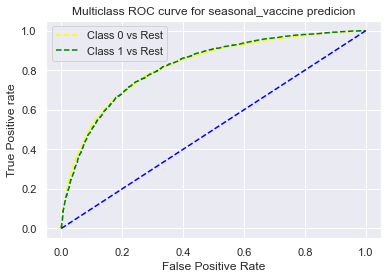

In [206]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for seasonal_vaccine predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);   

##### We Predicted h1n1 vaccine with 83% and seasonal vaccine with 75% accuracy.